# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.stats import gaussian_kde
from geopy.distance import geodesic

import warnings
warnings.filterwarnings('ignore')

# Preparing Data

In [4]:
# coordinate of restricted areas.
restricted_area = [
    {"name": "İstanbulMaltepe122 Evler Camii", "coordinate": [40.93157205395692, 29.151821147823625]},
    {"name": "İstanbulMaltepe15 Temmuz Şehitleri Camii", "coordinate": [40.87754122470283, 29.22326493550092]},
    {"name": "İstanbulMaltepeAbdurrahman Gürses Camii", "coordinate": [40.951728313154995, 29.132655219032177]},
    {"name": "İstanbulMaltepeAkşemsettin Camii", "coordinate": [40.92578600846861, 29.159381437667044]},
    {"name": "İstanbulMaltepeAli Bozbeyli Camii", "coordinate": [40.94094554268896, 29.12118646399757]},
    {"name": "İstanbulMaltepeAltıntepe Camii", "coordinate": [40.95311435344669, 29.1023786152564]},
    {"name": "İstanbulMaltepeAydınevler Camii", "coordinate": [40.95158929533694, 29.127023371679183]},
    {"name": "İstanbulMaltepeAydınlıkevler Süleyman Öksüzoğlu Camii", "coordinate": [40.95119751488176, 29.12558532894624]},
    {"name": "İstanbulMaltepeBağlarbaşı Camii", "coordinate": [40.93004758762535, 29.139432177963254]},
    {"name": "İstanbulMaltepeBaşıbüyük Merkez Camii", "coordinate": [40.95884563615886, 29.14729672275222]},
    {"name": "İstanbulMaltepeBülbüldere Mescidi", "coordinate": [40.931553359440336, 29.169426129706164]},
    {"name": "İstanbulMaltepeBüyük Bakkalköy Camii", "coordinate": [40.97088326106031, 29.198097235441626]},
    {"name": "İstanbulMaltepeCevizli İstasyon Camii", "coordinate": [40.91199176710717, 29.152850671948357]},
    {"name": "İstanbulMaltepeCumhuriyet Camii", "coordinate": [40.92450428083749, 29.130819296277508]},
    {"name": "İstanbulMaltepeEbubekir Camii", "coordinate": [40.94180996404612, 29.12587565919422]},
    {"name": "İstanbulMaltepeEmek Camii", "coordinate": [40.95082091239043, 29.117116668523444]},
    {"name": "İstanbulMaltepeEnsar Mescidi", "coordinate": [40.97083303316353, 29.12947493302392]},
    {"name": "İstanbulMaltepeEsenkent Fatih Camii", "coordinate": [40.92229827844611, 29.16932358221931]},
    {"name": "İstanbulMaltepeEsenkent Merkez Camii", "coordinate": [40.92522430726848, 29.162435709397126]},
    {"name": "İstanbulMaltepeEsenkent Ulu Camii", "coordinate": [40.93060094271703, 29.169086728748386]},
    {"name": "İstanbulMaltepeEsenkent Yavuz Sultan Selim Camii", "coordinate": [40.93698829815168, 29.169717858944217]},
    {"name": "İstanbulMaltepeEsenyurt Camii", "coordinate": [40.92083826384857, 29.140586371945687]},
    {"name": "İstanbulMaltepeFahri Kasapoğlu Camii", "coordinate": [40.955715052648515, 29.14731918775816]},
    {"name": "İstanbulMaltepeFatımatı Zehra Camii", "coordinate": [40.92930184602894, 29.154786871076666]},
    {"name": "İstanbulMaltepeFatmaçelebi Camii", "coordinate": [40.92628147381083, 29.154417730325886]},
    {"name": "İstanbulMaltepeFatmahatun Camii", "coordinate": [40.93536325826979, 29.16522610083121]},
    {"name": "İstanbulMaltepeFeyzullah Efendi Camii", "coordinate": [40.9202228086739, 29.129822183091242]},
    {"name": "İstanbulMaltepeFidanlık Camii", "coordinate": [40.924093235765, 29.14060297321109]},
    {"name": "İstanbulMaltepeFındıklı Hacı Muhsin Mescidi", "coordinate": [40.97146764449142, 29.13339525857151]},
    {"name": "İstanbulMaltepeFındıklı Merkez Camii", "coordinate": [40.96558282832594, 29.123508956772767]},
    {"name": "İstanbulMaltepeFındıklı Orhanbaşer Camii", "coordinate": [40.97082254369828, 29.129451700185733]},
    {"name": "İstanbulMaltepeFındıklı Seyitağa Camii", "coordinate": [40.970103640428455, 29.12336900164262]},
    {"name": "İstanbulMaltepeGirne Merkez Camii", "coordinate": [40.94377516212508, 29.13919514584372]},
    {"name": "İstanbulMaltepeGülsuyu Boğaziçi Camii", "coordinate": [40.9329036537728, 29.16662400051448]},
    {"name": "İstanbulMaltepeGülsuyu Cengiz Topel Camii", "coordinate": [40.92834043056792, 29.15836755698832]},
    {"name": "İstanbulMaltepeGülsuyu Cengiz Topel Camii", "coordinate": [40.92834043056792, 29.15836755698832]},
    {"name": "İstanbulMaltepeGülsuyu Gül Camii", "coordinate": [40.9321891488625, 29.161781146027426]},
    {"name": "İstanbulMaltepeGülsuyu Recepağa Camii", "coordinate": [40.929220048807764, 29.16373720019225]},
    {"name": "İstanbulMaltepeHacı Ahmet Süt Camii", "coordinate": [40.969156649187866, 29.140346459847486]},
    {"name": "İstanbulMaltepeHacı Mustafa Özyazıcı Camii", "coordinate": [40.94706903337922, 29.15930752574576]},
    {"name": "İstanbulMaltepeHacı Necipağa Camii", "coordinate": [40.94151101981349, 29.164914471491404]},
    {"name": "İstanbulMaltepeHalil İbrahim Camii", "coordinate": [40.94578427070075, 29.14955782824861]},
    {"name": "İstanbulMaltepeHasan Ergüvenli Mescidi", "coordinate": [40.924799442718644, 29.12750132874659]},
    {"name": "İstanbulMaltepeHatime Ali Camii", "coordinate": [40.94135174785265, 29.130125637335507]},
    {"name": "İstanbulMaltepeHüsniye Arat Camii", "coordinate": [40.93245824272432, 29.13519262875551]},
    {"name": "İstanbulMaltepeHz.ali Camii", "coordinate": [40.94148954659084, 29.15844378681516]},
    {"name": "İstanbulMaltepeHz.ömer Camii", "coordinate": [40.935219532008574, 29.1130526858475]},
    {"name": "İstanbulMaltepeİdealtepe Kadriye Hatun Camii", "coordinate": [40.9453952540942, 29.123606358571735]},
    {"name": "İstanbulMaltepeİmamı Rabbani Camii", "coordinate": [40.95184555765116, 29.163269488085763]},
    {"name": "İstanbulMaltepeİmdat Vakfı Camii", "coordinate": [40.93466004815799, 29.122697900200986]},
    {"name": "İstanbulMaltepeİsmail Ergin Tatlısu Camii", "coordinate": [40.9342610851438, 29.17160937353034]},
    {"name": "İstanbulMaltepeKağızmanlı Hacı Şükrü Mescidi", "coordinate": [41.09440162409225, 28.863561374868734]},
    {"name": "İstanbulMaltepeKaracabey (70 Evler) Camii", "coordinate": [40.92862288496332, 29.14339484432037]},
    {"name": "İstanbulMaltepeKılavuzçayırı Camii", "coordinate": [40.95311904879595, 29.109909000508424]},
    {"name": "İstanbulMaltepeKuba Camii", "coordinate": [40.93005772666894, 29.126686183477506]},
    {"name": "İstanbulMaltepeKüçükyalı Çınar Camii", "coordinate": [40.94346755915693, 29.1148288300088]},
    {"name": "İstanbulMaltepeKüçükyalı Merkez Camii", "coordinate": [40.94718344708871, 29.10908134245771]},
    {"name": "İstanbulMaltepeKulluk Camii", "coordinate": [40.939385838584215, 29.11537537069296]},
    {"name": "İstanbulMaltepeMavievler Camii", "coordinate": [40.94669151904717, 29.130854800020938]},
    {"name": "İstanbulMaltepeMedine Camii", "coordinate": [40.94191815179632, 29.14962527163023]},
    {"name": "İstanbulMaltepeMehmet Erensoy Camii", "coordinate": [40.95871637355985, 29.154102330673908]},
    {"name": "İstanbulMaltepeMevlana Camii", "coordinate": [40.928694055033404, 29.132283671638312]},
    {"name": "İstanbulMaltepeMimarsinan Camii", "coordinate": [40.921685616593585, 29.149716812036278]},
    {"name": "İstanbulMaltepeNarlı Camii", "coordinate": [40.93509206934896, 29.146368414829865]},
    {"name": "İstanbulMaltepeSabır Mescidi", "coordinate": [40.92550054830975, 29.145539315666547]},
    {"name": "İstanbulMaltepeŞehit Ömer Halisdemir Camii", "coordinate": [40.918553156815115, 29.1549825582622]},
    {"name": "İstanbulMaltepeTaşocakları Camii", "coordinate": [40.9243991548964, 29.138908916002467]},
    {"name": "İstanbulMaltepeVarnalı Galipbey Camii", "coordinate": [40.9561425882052, 29.10747640301819]},
    {"name": "İstanbulMaltepeYavuz Selim Camii", "coordinate": [40.918935965294914, 29.143647916869565]},
    {"name": "İstanbulMaltepeYıldızevler Camii", "coordinate": [40.923182878547756, 29.154243623611006]},
    {"name": "Esenkent Ortaokulu", "coordinate": [40.9256703087646, 29.164475268214257]},
    {"name": "Ahmet Rasim İlkokulu", "coordinate": [40.952813778245954, 29.101899907312163]},
    {"name": "Albay Niyazi Esen İlkokulu", "coordinate": [40.94769604583072, 29.114304729058624]},
    {"name": "Ataköseoğlu İlkokulu", "coordinate": [40.92013919853208, 29.13333585774527]},
    {"name": "Atilla Uras Anadolu Lisesi", "coordinate": [40.94137181948531, 29.13494854260065]},
    {"name": "Bağlarbaşı İlkokulu", "coordinate": [40.92823684335573, 29.142948347298248]},
    {"name": "Cumhuriyet Ortaokulu", "coordinate": [40.93132889924059, 29.15084401640849]},
    {"name": "E.C.A Elginkan Anadolu Lisesi", "coordinate": [40.92721091006351, 29.13626622919105]},
    {"name": "Ertuğrul Gazi Anadolu Lisesi", "coordinate": [40.92895978273367, 29.16717092800611]},
    {"name": "Evliya Çelebi İlkokulu", "coordinate": [40.943155320835125, 29.14147867641953]},
    {"name": "Güzide Yılmaz İlkokulu", "coordinate": [40.94406052992108, 29.124605256668005]},
    {"name": "Halit Armay Anaokulu", "coordinate": [40.9524320454816, 29.1118798001832]},
    {"name": "Hasan Şadoğlu Mesleki ve Teknik Anadolu Lisesi", "coordinate": [40.94474953853762, 29.124685899561975]},
    {"name": "Hülya Oğuz Anaokulu", "coordinate": [40.96940684524267, 29.135988400817727]},
    {"name": "Kadir Has Anadolu Lisesi", "coordinate": [40.95277935434724, 29.117020301142894]},
    {"name": "Küçükyalı Mesleki ve Teknik Anadolu Lisesi", "coordinate": [40.949809046047754, 29.1300512713197]},
    {"name": "Küçükyalı Askeri Lojmanları Anaokulu", "coordinate": [40.95653064247817, 29.119146599880917]},
    {"name": "Küçükyalı Rezan Has Anadolu Lisesi", "coordinate": [40.95246596722436, 29.11652834007248]},
    {"name": "Maltepe Fen Lisesi", "coordinate": [40.943609942963604, 29.122685842143667]},
    {"name": "Maltepe Mesleki ve Teknik Anadolu Lisesi", "coordinate": [40.92101254911089, 29.12890502907055]},
    {"name": "Maltepe Kız Anadolu İmam Hatip Lisesi", "coordinate": [40.92239636999334, 29.140171112596914]},
    {"name": "Maltepe Mesleki Eğitim Merkezi", "coordinate": [40.920094212106655, 29.13278873787397]},
    {"name": "Maltepe Rehberlik ve Araştırma Merkezi", "coordinate": [40.94899562124548, 29.108942684572153]},
    {"name": "Mehmet Salih Bal Mesleki ve Teknik Anadolu Lisesi", "coordinate": [40.94190114223583, 29.13619079572799]},
    {"name": "Mutluhan-Uzunal-Çolakoğlu Ortaokulu", "coordinate": [40.9436209420005, 29.11969145761082]},
    {"name": "Mürüvvet Hanım İlkokulu", "coordinate": [40.953407594524776, 29.09735028997342]},
    {"name": "Nazmi Duhani İlkokulu", "coordinate": [40.931911748710654, 29.123971913567527]},
    {"name": "Orhangazi Anadolu Lisesi", "coordinate": [40.94155033536291, 29.2879917932866]},
    {"name": "Prof. Abdullah Türkoğlu Ortaokulu", "coordinate": [40.93091971945013, 29.131694422940733]},
    {"name": "Serpil Şahinoğlu Anaokulu", "coordinate": [40.930823848382786, 29.151439571328]},
    {"name": "Şehit Öğr.Nevzat Akdemir İlkokulu", "coordinate": [40.933966710421295, 29.170233355699516]},
    {"name": "Zümrütevler İlkokulu", "coordinate": [40.94403692781164, 29.153787172970695]},
    {"name": "Maltepe Orhangazi Anadolu İmam Hatip Lisesi", "coordinate": [40.91800750491866, 29.147648171483283]},
    {"name": "Şehit Murat Naiboğlu İmam Hatip Ortaokulu", "coordinate": [40.91559626531459, 29.140444771946655]},
    {"name": "Fatih Sultan Mehmet Mesleki ve Teknik Anadolu Lisesi", "coordinate": [40.923445774836686, 29.148870559213474]},
    {"name": "TEV Abdullah Nezahat Erboz İlkokulu", "coordinate": [40.933643075564156, 29.11997065740218]},
    {"name": "Küçükyalı E.C.A Elginkan İlkokulu", "coordinate": [40.943961450092736, 29.113214458247793]},
    {"name": "Güzin Dinçkök Ortaokulu", "coordinate": [40.922829455768316, 29.14880050051159]},
    {"name": "Kazım Tunç İlkokulu", "coordinate": [40.9291434102968, 29.13397912143916]},
    {"name": "Hasan Şadoğlu Ortaokulu", "coordinate": [40.94017315174522, 29.11563617165361]},
    {"name": "Binbaşı Necati Bey İlkokulu", "coordinate": [40.9181299427185, 29.152444271012005]},
    {"name": "Adnan Kahveci Ortaokulu", "coordinate": [40.937261847120965, 29.144017529072677]},
    {"name": "Gülsuyu İlkokulu", "coordinate": [40.92826027615932, 29.156378161686582]},
    {"name": "Şehit İbrahim Cengiz İmam Hatip Ortaokulu", "coordinate": [40.95910754465844, 29.148585800187377]},
    {"name": "Atatürk İlkokulu", "coordinate": [40.955583886566366, 29.150289470972204]},
    {"name": "İbb Barbaros Hayrettin Paşa Ortaokulu", "coordinate": [40.949389242470914, 29.161880299870067]},
    {"name": "Orhangazi İlkokulu", "coordinate": [40.91862465287116, 29.146700229828507]},
    {"name": "Celal Avşar Ortaokulu", "coordinate": [40.92780451403999, 29.129031807774197]},
    {"name": "Emine-İbrahim Pekin Ortaokulu", "coordinate": [40.94283763806214, 29.13578972844047]},
    {"name": "Muhsine Zeynep Ortaokulu", "coordinate": [40.9487435390157, 29.108691799559857]},
    {"name": "İmdat Vakfı Dumlupınar Ortaokulu", "coordinate": [40.933647452616846, 29.1235172582575]},
    {"name": "Suzan Ahmet Yalkın Ortaokulu", "coordinate": [40.94850984969437, 29.126182671639413]},
    {"name": "Maltepe Halk Eğitimi Merkezi", "coordinate": [40.9228358624028, 29.1281169008316]},
    {"name": "Şehit Er Çağlar Mengü Anadolu İmam Hatip Lisesi", "coordinate": [40.94427422059492, 29.15305713822618]},
    {"name": "Kadir Has İlkokulu", "coordinate": [40.94904490468408, 29.10166165335564]},
    {"name": "Tepe İnşaat İlkokulu", "coordinate": [40.95123845850113, 29.16247377259754]},
    {"name": "Suzan Ahmet Yalkın İlkokulu", "coordinate": [40.948485538518305, 29.126214857307616]},
    {"name": "Nezahat Aslan Ekşioğlu İlkokulu", "coordinate": [40.940216551966266, 29.135175042761777]},
    {"name": "Altay Çeşme İlkokulu", "coordinate": [40.9360842369819, 29.12990265729626]},
    {"name": "Vasfi Rıza Zobu İlkokulu", "coordinate": [40.92239584248285, 29.143103499870612]},
    {"name": "İsmet Kuralkan İlkokulu", "coordinate": [40.96899589442281, 29.19864180051199]},
    {"name": "İsmet Kuralkan Ortaokulu", "coordinate": [40.96899589442281, 29.19864180051199]},
    {"name": "Feyzullah-Turgay Ciner Ortaokulu", "coordinate": [40.92217773432593, 29.131450472785588]},
    {"name": "Halit Armay Anadolu Lisesi", "coordinate": [40.95209125137881, 29.110677729687733]},
    {"name": "Gülsuyu İmam Hatip Ortaokulu", "coordinate": [40.92876145998951, 29.155810629699957]},
    {"name": "Osmangazi İmam Hatip Ortaokulu", "coordinate": [40.9223878292939, 29.14024206889003]},
    {"name": "Albay Niyazi Esen Ortaokulu", "coordinate": [40.947712253487026, 29.114283271951553]},
    {"name": "Mediha Engizer Meslekî ve Teknik Anadolu Lisesi", "coordinate": [40.9593302468008, 29.143216900524422]},
    {"name": "50 Yıl Besim Kadırgan İlkokulu", "coordinate": [40.92609608303841, 29.16503883453535]},
    {"name": "Kadir Rezan Has İlkokulu", "coordinate": [40.95247406978078, 29.116549798123874]},
    {"name": "Handan Hayrettin Yelkikanat Mesleki ve Teknik Anadolu Lisesi", "coordinate": [40.9411307341711, 29.133409141510633]},
    {"name": "İsmet İnönü İlkokulu", "coordinate": [40.933825947537045, 29.144762729065054]},
    {"name": "Prof. Dr. Mustafa Zengin Ortaokulu", "coordinate": [40.967520787768024, 29.12278294016051]},
    {"name": "Kaşgarlı Mahmut Ortaokulu", "coordinate": [40.93433725347438, 29.15652874367485]},
    {"name": "Yılmaz Mızrak Ortaokulu", "coordinate": [40.95896663491602, 29.144189914400343]},
    {"name": "İBB MAHMUT BAYRAM İMAM HATİP ORTAOKULU", "coordinate": [40.94370286696971, 29.15544400178836]},
    {"name": "Yaşar Şadiye Cimilli Kız Anadolu İmam Hatip Lisesi", "coordinate": [40.92060018277742, 29.14339864617845]},
    {"name": "Fındıklı Şehit Gökhan Soylu İlkokulu", "coordinate": [40.97092854316383, 29.142565026362757]},
    {"name": "ŞEHİT MUSTAFA KAYMAKÇI ANADOLU İMAM HATİP LİSESİ", "coordinate": [40.9447057590399, 29.165942706333478]},
    {"name": "Maltepe Şehit Murat Mertel Özel Eğitim Meslek Okulu", "coordinate": [40.94364123407812, 29.15403242810576]},
    {"name": "PROF. DR. BEKİR TOPALOĞLU İMAM HATİP ORTAOKULU", "coordinate": [40.93103023169875, 29.13216784151422]},
    {"name": "ŞEHİT BURHAN ÖNER İLKOKULU", "coordinate": [40.937092156669124, 29.143238958561923]},
    {"name": "Şehit Osman Yılmaz Kız Anadolu İmam Hatip Lisesi", "coordinate": [40.979257840815166, 29.16073753035096]},
    {"name": "ŞEHİT İLHAN VARANK FEN LİSESİ", "coordinate": [40.95244242474092, 29.127060169110447]},
    {"name": "ALTINTEPE İMAM HATİP ORTAOKULU", "coordinate": [40.95243073647119, 29.10446999924107]},
    {"name": "MALTEPE KADİR HAS BİLİM VE SANAT MERKEZİ", "coordinate": [40.92251269153714, 29.140213353617323]},
    {"name": "Maltepe Adalet Mesleki Eğitim Merkezi", "coordinate": [40.967231579643176, 29.202996468963974]},
    {"name": "TOKİ Maltepe Anadolu Lisesi", "coordinate": [40.967993795492575, 29.127240259176705]},
    {"name": "Toki Maltepe İlkokulu", "coordinate": [40.966937590938734, 29.12851292478382]},
    {"name": "Sezai Karakoç Anadolu İmam Hatip Lisesi", "coordinate": [40.96733970185324, 29.130746271332214]},
    {"name": "Şehit İbrahim Cengiz Ortaokul", "coordinate": [40.95921290175467, 29.148521422931108]},
    {"name": "Gülensu Anaokulu", "coordinate": [40.935899122407704, 29.16411264921928]},
    {"name": "Mürüvvet Hanım İlkokulu", "coordinate": [40.96854750900424, 29.125879738491125]},
    {"name": "Adnan Kahveci Ortaokulu", "coordinate": [40.9378526405526, 29.144092626875725]},
    {"name": "Ahmet Rasim İlkokulu", "coordinate": [40.95291650962514, 29.101886267110938]},
    {"name": "Altay Çeşme Anaokulu", "coordinate": [40.93598348791135, 29.12999928352935]},
    {"name": "Cumhuriyet Maltepe Ortaokul", "coordinate": [40.931515355478645, 29.15085473827373]},
    {"name": "Evliya Çelebi Maltepe İlkokul", "coordinate": [40.94330263682051, 29.141490953618543]},
    {"name": "Fındıklı Şehit Gökhan Soylu İlkokulu", "coordinate": [40.97108248424334, 29.142586480603825]},
    {"name": "Güzide Yılmaz İlkokulu", "coordinate": [40.94423074357351, 29.124551609438374]},
    {"name": "İBB Barbaros Hayrettin Paşa Ortaokulu", "coordinate": [40.94955133855697, 29.161805194094487]},
    {"name": "Kazım Tunç İlkokulu", "coordinate": [40.9292893468893, 29.13402202848628]},
    {"name": "Orhangazi Maltepe İlkokulu", "coordinate": [40.92228377533811, 29.152193026338672]},
    {"name": "Suzan Ahmet Yalkın İlkokulu", "coordinate": [40.94864763729537, 29.126225582454904]},
    {"name": "Tepe İnşaat İlkokulu", "coordinate": [40.95138434349578, 29.162484495946874]},
    {"name": "Yıl Besim Kadırgan İlkokulu", "coordinate": [40.92624000822597, 29.16505798245358]},
    {"name": "Vasfi Rıza Zobu İlkokulu", "coordinate": [40.92255800479789, 29.143103495945216]},
    {"name": "Mutluhan Uzunal Çolakoğlu Ortaokul", "coordinate": [40.94379926082837, 29.119648538274383]},
    {"name": "Şehit Öğretmen Nevzat Akdemir İlkokul", "coordinate": [40.9340271675512, 29.170198262896367]},
    {"name": "Nezahat Aslan Ekşioğlu Özel Eğitim Anaokulu", "coordinate": [40.94038275093378, 29.1351965]},
    {"name": "TOKİ Maltepe Anadolu Lisesi", "coordinate": [40.96796796283846, 29.127222132981796]},
    {"name": "TOKİ Maltepe Anaokulu", "coordinate": [40.966905984574566, 29.12848140799126]},
    {"name": "Maltepe Adalet Halk Eğitimi Merkezi", "coordinate": [40.92298475476849, 29.128069234396005]},
    {"name": "MALTEPE KADİR HAS BİLİM VE SANAT MERKEZİ", "coordinate": [40.92251269153714, 29.140213353617323]},
    {"name": "Maltepe Adalet Mesleki Eğitim Merkezi", "coordinate": [40.967231579643176, 29.202996468963974]},
    {"name": "TOKİ Maltepe Anadolu Lisesi", "coordinate": [40.967993795492575, 29.127240259176705]},
    {"name": "Toki Maltepe İlkokulu", "coordinate": [40.966937590938734, 29.12851292478382]}
]
# Coordinates of Migros stores.
migros_coordinates = [
    {"name": "KÜÇÜKYALI HILLTOWN MACROCENTER", "coordinate": [40.952686658232295, 29.121208035372987]},
    {"name": "PIAZZA MALTEPE MACROCENTER", "coordinate": [40.92128470164432, 29.165538126387283]},
    {"name": "ASKERİ LOJ. KÜÇÜKYALI İST M", "coordinate": [40.95468563836487, 29.123821421100054]},
    {"name": "IRMAKLAR SK MALTEPE İSTANBUL M", "coordinate": [40.94383179920128, 29.136009205869826]},
    {"name": "NISH ADALAR MALTEPE MM MİGROS", "coordinate": [40.94870794538319, 29.160562955773933]},
    {"name": "GİRNE MAH MALTEPE İST MİNİGROS", "coordinate": [40.938631772931316, 29.13806174161115]},
    {"name": "GÜLYOLU MALTEPE İST MİNİGROS", "coordinate": [40.92802770391542, 29.1389340834801]},
    {"name": "KADİR HAS CD. İST MİNİGROS", "coordinate": [40.9447965345502, 29.117321250036145]},
    {"name": "MENEKŞELİ SK. MALTEPE MİNİGROS", "coordinate": [40.925836713623404, 29.130363152522857]},
    {"name": "MALTEPE YALI CAD..MACROKIOSK", "coordinate": [40.918000068975864, 29.136015788077426]},
    {"name": "RİTİM AVM MALTEPE İSTANBUL MM", "coordinate": [40.92181694509281, 29.15815086660945]},
    {"name": "TUGAYYOLU MALTEPE MM MİGROS", "coordinate": [40.917428404776196, 29.159940216855254]},
    {"name": "OFİSPARK MALTEPE MM MİGROS", 'coordinate': [40.93799450691945, 29.135251567008822]},
    {"name": "MESA İSTANBUL MALTEPE MM", "coordinate": [40.93191548340477, 29.127265637593823]},
    {"name": "NARCITY MALTEPE İSTANBUL M", "coordinate": [40.95487209668625, 29.167318865563793]},
    {"name": "BAĞLARBAŞI MALTEPE M MİGROS", "coordinate": [40.92381052092096, 29.13449886571158]},
    {"name": "EVİNPARK MALTEPE M MİGROS", "coordinate": [40.936596283607656, 29.132266250105125]},
    {"name": "MJET MALTEPE YALI MAHALLESİ", "coordinate": [40.9185294335012, 29.133939204295885]},
    {"name": "MJET ZÜMRÜTEVLER MALTEPE İST", "coordinate": [40.93742235769825, 29.141501285893472]},
    {"name": "MJET FINDIKLI MALTEPE", "coordinate": [40.969187532857674, 29.12345584823173]},
    {"name": "MJET NİSH AVLU MALTEPE", "coordinate": [40.944371636564995, 29.15901126487112]},
    {"name": "MJET FİRUZ ÇIKMAZI MALTEPE İST", "coordinate": [40.94320780411222, 29.144398997022627]},
    {"name": "MJET ALTINTEPE İSTANBUL", "coordinate": [40.9527089740197, 29.097007129763984]},
    {"name": "MJET KÜÇÜKYALI 63", "coordinate": [40.94923165010923, 29.10590466959333]},
    {"name": "MJET KÜÇÜKYALI PO İSTASYON", "coordinate": [40.94791709562063, 29.10654747189149]},
    {"name": "MJET İDEALTEPE CADDE İSTANBUL", "coordinate": [40.938185139926404, 29.11945265477902]},
    {"name": "MJET ORHANGAZİ CADDESİ MALTEPE", "coordinate": [40.92147188412524, 29.148882922715064]},
    {"name": "MJET GİRNE MAHALLESİ MALTEPE", "coordinate": [40.94104461467149, 29.14056061182688]},
    {"name": "MJET MALTEPE NEVADA", "coordinate": [40.936220953009226, 29.125270928031444]},
    {"name": "MJET NİSH ADALAR", "coordinate": [40.9442638911282, 29.159328090876457]},
    {"name": "MJET FUAYE PO", "coordinate": [40.95051052069334, 29.162685408802766]},
    {"name": "ALTINTEPE M MİGROS", "coordinate": [40.95343875225428, 29.10032154626482]},
    {"name": "FUAYE İSTANBUL MMM MİGROS", "coordinate": [40.950149181140475, 29.165442147825367]},
    {"name": "KÜÇÜKYALI İSTANBUL M MİGROS", "coordinate": [40.944769195810856, 29.112264258198973]},
    {"name": "SÜREYYA PAŞA MMM MİGROS", "coordinate": [40.925774074670755, 29.124492347070344]}
]

# Coordinates of A101 stores.
a101_coordinates = [
    {"name": "Adalı", "coordinate": [40.927394883085235, 29.129755968898213]},
    {"name": "Adatepe", "coordinate": [40.945790719761604, 29.158524608036142]},
    {"name": "Ahmet Kutsi Tecer", "coordinate": [40.94697264869294, 29.108992595588575]},
    {"name": "Akarsu", "coordinate": [40.94320020106798, 29.14449386704606]},
    {"name": "Altayçeşme", "coordinate": [40.93709684710951, 29.129451295588076]},
    {"name": "Atatürk", "coordinate": [40.932473517602, 29.13659263658489]},
    {"name": "Ayerdem", "coordinate": [40.93334053257737, 29.126336916594965]},
    {"name": "Ayhan", "coordinate": [40.91748109292999, 29.150235387789607]},
    {"name": "Bağdat Park", "coordinate": [40.91869123203214, 29.142348945765892]},
    {"name": "Bağlarbaşı", "coordinate": [40.92390667555307, 29.135720080242788]},
    {"name": "Başıbüyük", "coordinate": [40.95806043821966, 29.147749778886645]},
    {"name": "Bülbül", "coordinate": [40.945248349238604, 29.121603422571827]},
    {"name": "Büyükbakkalköy", "coordinate": [40.97052190607659, 29.198820234230894]},
    {"name": "Camialtı", "coordinate": [40.958074773304325, 29.147542257606666]},
    {"name": "Canan", "coordinate": [40.93999089666084, 29.151950365579967]},
    {"name": "Değirmenyolu", "coordinate": [40.95442013315046, 29.101123215161365]},
    {"name": "Doğuşkent", "coordinate": [40.93947090004343, 29.139418992788137]},
    {"name": "Dragos", "coordinate": [40.91728899109436, 29.144277700000487]},
    {"name": "Efe Boz", "coordinate": [40.93624733683455, 29.133488717904036]},
    {"name": "Elifli", "coordinate": [40.93952567986965, 29.139381265431897]},
    {"name": "Ertuğrul Gazi", "coordinate": [40.948470330387245, 29.1547878715784]},
    {"name": "Eski Bağdat", "coordinate": [40.94702549200248, 29.109547693411244]},
    {"name": "Evren", "coordinate": [40.97198499803409, 29.130256420815687]},
    {"name": "Fatih", "coordinate": [40.92046478730853, 29.147404819387035]},
    {"name": "Figen", "coordinate": [40.92615799253096, 29.14552500589081]},
    {"name": "Filiz", "coordinate": [40.936578426258606, 29.14713455596701]},
    {"name": "Fındıklı", "coordinate": [40.971202286232355, 29.135924803001316]},
    {"name": "Girne", "coordinate": [40.943493943193914, 29.14495179745375]},
    {"name": "Grand House", "coordinate": [40.923046846303116, 29.131475958484746]},
    {"name": "Gül", "coordinate": [40.95218713357522, 29.10994516390435]},
    {"name": "Gülsuyu", "coordinate": [40.92764419655678, 29.15696404057653]},
    {"name": "Gülyolu", "coordinate": [40.92485574587402, 29.14088192613519]},
    {"name": "Güneşlik", "coordinate": [40.922768910478915, 29.168870251895438]},
    {"name": "Handegül", "coordinate": [40.94234542075043, 29.14945903212188]},
    {"name": "Hanımeli", "coordinate": [40.93781973383071, 29.145038866751978]},
    {"name": "Heykel", "coordinate": [40.931897227392454, 29.16420758354888]},
    {"name": "Kadir Has", "coordinate": [40.94368194803579, 29.117591299214254]},
    {"name": "Kartal", "coordinate": [40.93654913833068, 29.14726759744085]},
    {"name": "Kavaklıbayır", "coordinate": [40.96668135619129, 29.114802774304895]},
    {"name": "Kooperatif", "coordinate": [40.928863160423774, 29.14173620789344]},
    {"name": "Küçükyalı", "coordinate": [40.93234703451013, 29.136646549836268]},
    {"name": "Kılavuzçayırı", "coordinate": [40.95238151964869, 29.10986665140849]},
    {"name": "Kırlangıç", "coordinate": [40.92722413852877, 29.133725080243018]},
    {"name": "Kırçiçeği", "coordinate": [40.950434119475744, 29.127854717295303]},
    {"name": "Madenci", "coordinate": [40.94032453090845, 29.14242820164443]},
    {"name": "Maltepe", "coordinate": [40.92862045414734, 29.134665477144317]},
    {"name": "Mavıevler", "coordinate": [40.946097556545276, 29.12880362390243]},
    {"name": "Menekşeci Darkstore", "coordinate": [40.97140661473956, 29.133924370173283]},
    {"name": "Mercan", "coordinate": [40.97143901739909, 29.134138946895533]},
    {"name": "Namık Kemal", "coordinate": [40.93782327708093, 29.12133876675202]},
    {"name": "Nedim Özpolat", "coordinate": [40.91918156355658, 29.131472337914726]},
    {"name": "Nil Caddesı", "coordinate": [40.94123489075919, 29.153956025232937]},
    {"name": "Nish Adalar", "coordinate": [40.94683712314109, 29.16719959558862]},
    {"name": "Orhangazi", "coordinate": [40.920479325615176, 29.14735552723237]},
    {"name": "Orkide", "coordinate": [40.92358760959293, 29.14591311378964]},
    {"name": "Ortanca", "coordinate": [40.93233737572602, 29.164425964993736]},
    {"name": "Palmiye", "coordinate": [40.97043908018438, 29.130019595590085]},
    {"name": "Piri Reis", "coordinate": [40.91708383018474, 29.143594824422983]},
    {"name": "Preveze", "coordinate": [40.94865312002092, 29.12871766675268]},
    {"name": "Ritim İstanbul", "coordinate": [40.92122786710252, 29.157222156156422]},
    {"name": "Sahil", "coordinate": [40.919270134807334, 29.131550271622423]},
    {"name": "Saray Maltepe", "coordinate": [40.94276202024538, 29.114332385182973]},
    {"name": "Sarmaşık", "coordinate": [40.97197054979308, 29.130265509192995]},
    {"name": "Seyitağa", "coordinate": [40.96895696591541, 29.123756171008925]},
    {"name": "Seyrantepe", "coordinate": [40.94768409358067, 29.166132798526473]},
    {"name": "Sulhi Dönmezer", "coordinate": [40.930277200380615, 29.133284555638674]},
    {"name": "Sırmakeş", "coordinate": [40.9396458282932, 29.1528508161723]},
    {"name": "Talatpaşa", "coordinate": [40.9185783171644, 29.151399680297757]},
    {"name": "Toros", "coordinate": [40.91718960109349, 29.14424450598503]},
    {"name": "Tülin", "coordinate": [40.93491750586262, 29.148000761384083]},
    {"name": "Varna Maltepe", "coordinate": [40.93360061298113, 29.133128870889713]},
    {"name": "Yeni Hancıoğlu", "coordinate": [40.97002274280754, 29.140095813262924]},
    {"name": "Yeni Selvi", "coordinate": [40.96915224060489, 29.127712327367597]},
    {"name": "Yeni Selçukbey", "coordinate": [40.95041177110291, 29.127988561740242]},
    {"name": "Yeşiltepe", "coordinate": [40.93976307558044, 29.11683454795809]},
    {"name": "Yüzevler", "coordinate": [40.93410039239821, 29.12622891093225]},
    {"name": "Yıldırım", "coordinate": [40.92787699876612, 29.15715151412576]},
    {"name": "Zencefıl", "coordinate": [40.92719657520457, 29.16578829373469]},
    {"name": "Zuhal", "coordinate": [40.91765828300148, 29.154259993734073]},
    {"name": "Zümrüt Evler", "coordinate": [40.93969573233883, 29.117204716626933]},
    {"name": "Çamlı E5", "coordinate": [40.93965706296123, 29.133351893735465]},
    {"name": "Çağla", "coordinate": [40.947899653357794, 29.16649500612658]},
    {"name": "Çetin", "coordinate": [40.94873403528536, 29.108871445617062]},
    {"name": "Çınar Maltepe", "coordinate": [40.947581725490295, 29.109043179708422]},
    {"name": "Özmen", "coordinate": [40.947855637118835, 29.108184945533097]},
    {"name": "İdealtepe", "coordinate": [40.93946988115979, 29.117319572778445]}
]

# Coordinates of BIM stores.
bim_coordinates = [
    {"name": "5 ADA MALTEPE", "coordinate": [40.94386611375143, 29.1593275547878]},
    {"name": "50. YIL / MALTEPE", "coordinate": [40.94170836109047, 29.125923317801558]},
    {"name": "ADATEPE / MALTEPE", "coordinate": [40.934796487365354, 29.12198313146719]},
    {"name": "ALTINTEPE / MALTEPE", "coordinate": [40.95369322987723, 29.103950633501157]},
    {"name": "ATAMAN /MALTEPE", "coordinate": [40.96905938171349, 29.13207767054535]},
    {"name": "AYDINEVLER / MALTEPE", "coordinate": [40.94985677674711, 29.12786684694814]},
    {"name": "BAĞDAT /MALTEPE", "coordinate": [40.949654109509304, 29.10452194539834]},
    {"name": "BARIŞ / MALTEPE", "coordinate": [40.93989783562922, 29.154892719399843]},
    {"name": "BAŞAK / MALTEPE", "coordinate": [40.94800497158564, 29.11417993706625]},
    {"name": "BAŞARAN / MALTEPE", "coordinate": [40.93299949439397, 29.151859974628895]},
    {"name": "BAŞIBÜYÜK / MALTEPE", "coordinate": [40.95724604212229, 29.146871673430965]},
    {"name": "BAŞIBÜYÜK /MALTEPE", "coordinate": [40.97296800999857, 29.14446503813377]},
    {"name": "BEGONYA / MALTEPE", "coordinate": [40.93882155180379, 29.12830015179489]},
    {"name": "BEŞEVLER / MALTEPE", "coordinate": [40.92524624311455, 29.13240108769613]},
    {"name": "BÜYÜKTUR /MALTEPE", "coordinate": [40.93784048147304, 29.11952163506918]},
    {"name": "CADDE YÜZEVLER / MALTEPE", "coordinate": [40.930324252671795, 29.129116939058743]},
    {"name": "ÇAMLIK / MALTEPE", "coordinate": [40.94306827512642, 29.14447439353678]},
    {"name": "ÇARŞI / MALTEPE", "coordinate": [40.92526790248133, 29.13240319983509]},
    {"name": "ÇINAR / MALTEPE", "coordinate": [40.96856136703116, 29.140070293003298]},
    {"name": "DEĞİRMENYOLU /MALTEPE", "coordinate": [40.95450431329372, 29.101147948094518]},
    {"name": "DENİZCİLER / MALTEPE", "coordinate": [40.92680486970823, 29.144634970990133]},
    {"name": "DOĞUŞKENT / MALTEPE", "coordinate": [40.938922039048016, 29.140371114762267]},
    {"name": "DRAGOS / KARTAL", "coordinate": [40.91148500049741, 29.152348242954268]},
    {"name": "EFEBOZ /MALTEPE", "coordinate": [40.935995323794735, 29.13252067830462]},
    {"name": "EMEK /MALTEPE", "coordinate": [40.950260769456435, 29.11864830321464]},
    {"name": "ERCİYES / MALTEPE", "coordinate": [40.91571477764781, 29.14808064302144]},
    {"name": "ESENKENT / MALTEPE", "coordinate": [40.923207082700124, 29.16864021452266]},
    {"name": "EVREN CAD. / MALTEPE", "coordinate": [40.969633352419756, 29.123062987094592]},
    {"name": "FERAH / MALTEPE", "coordinate": [40.942204568009444, 29.153465990089504]},
    {"name": "FEYZULLAH / MALTEPE", "coordinate": [40.92376657950671, 29.129281481374232]},
    {"name": "GAZİ / MALTEPE", "coordinate": [40.97125053840908, 29.132820300844788]},
    {"name": "GİRNE / MALTEPE", "coordinate": [40.94339937502391, 29.13979040766674]},
    {"name": "GÜLENSU / MALTEPE", "coordinate": [40.933430436738576, 29.16353932315151]},
    {"name": "GÜLSUYU / MALTEPE", "coordinate": [40.92727775602385, 29.15667057051255]},
    {"name": "GÜLYOLU / MALTEPE", "coordinate": [40.92398979400527, 29.14078350068368]},
    {"name": "HANCIOĞLU / MALTEPE", "coordinate": [40.96908529499158, 29.13207796610294]},
    {"name": "HANIMELİ / MALTEPE", "coordinate": [40.93746760608058, 29.145266731005083]},
    {"name": "HASTANE / MALTEPE", "coordinate": [40.921854070921945, 29.13836770942411]},
    {"name": "IŞIKLAR / MALTEPE", "coordinate": [40.93265015812681, 29.136805254833604]},
    {"name": "İDEALTEPE / MALTEPE", "coordinate": [40.94253446386219, 29.114689753785473]},
    {"name": "İNCEYOL / MALTEPE", "coordinate": [40.954761889605436, 29.1117688779914]},
    {"name": "KADRİYE HATUN / MALTEPE", "coordinate": [40.94533439803117, 29.123663089916683]},
    {"name": "KANİPAŞA MALTEPE", "coordinate": [40.930472920695145, 29.16921541768973]},
    {"name": "KARACA / MALTEPE", "coordinate": [40.94791098129229, 29.15396458037732]},
    {"name": "KARADENİZ / MALTEPE", "coordinate": [40.94811934292254, 29.13046067218526]},
    {"name": "KARANFİL / MALTEPE", "coordinate": [40.94006352033881, 29.153250526834565]},
    {"name": "KARAYOLLARI / MALTEPE", "coordinate": [40.94634248278612, 29.118673632713776]},
    {"name": "KARDEŞ / MALTEPE", "coordinate": [40.92130331815685, 29.15163275563329]},
    {"name": "KENTPLUS /MALTEPE", "coordinate": [40.96776727420696, 29.125242132082306]},
    {"name": "KIRÇİÇEĞİ / MALTEPE", "coordinate": [40.950155909583316, 29.12333873804331]},
    {"name": "KIZILAY /MALTEPE", "coordinate": [40.93495294906234, 29.123986474315767]},
    {"name": "KOOPERATİF / MALTEPE", "coordinate": [40.92864245147052, 29.141128058917342]},
    {"name": "KÜÇÜKYALI / MALTEPE", "coordinate": [40.946811323681494, 29.109222604389288]},
    {"name": "MALTEPE / İSTANBUL", "coordinate": [40.927311770690615, 29.130783941688712]},
    {"name": "MENDERES/MALTEPE", "coordinate": [40.942094740070374, 29.146026787432554]},
    {"name": "MERCAN/MALTEPE", "coordinate": [40.935869299337135, 29.14681401412792]},
    {"name": "NADİRE / MALTEPE", "coordinate": [40.924720417049784, 29.16093599314204]},
    {"name": "OMEGA / MALTEPE", "coordinate": [40.944022249043236, 29.13390859205389]},
    {"name": "ORHANGAZİ / MALTEPE", "coordinate": [40.91929515747133, 29.14664457386512]},
    {"name": "ORTAK / MALTEPE", "coordinate": [40.932519065593176, 29.134445708448418]},
    {"name": "ÖZCAN / MALTEPE", "coordinate": [40.92008626106238, 29.139837187528876]},
    {"name": "SAĞLIK / MALTEPE", "coordinate": [40.93046024955185, 29.134863577367213]},
    {"name": "SAHİL / MALTEPE", "coordinate": [40.91805183551388, 29.13426704603057]},
    {"name": "SEVGİ / MALTEPE", "coordinate": [40.91765418027347, 29.14722682004058]},
    {"name": "SÜMBÜL / MALTEPE", "coordinate": [40.970288026441445, 29.124820764698743]},
    {"name": "SÜREYYA PAŞA / MALTEPE", "coordinate": [40.95437581782561, 29.14423945532768]},
    {"name": "TALATPAŞA / MALTEPE", "coordinate": [40.91796385005236, 29.150548171811565]},
    {"name": "TUGAYYOLU / MALTEPE", "coordinate": [40.918759046754715, 29.155692523034652]},
    {"name": "TURHAN / MALTEPE", "coordinate": [40.93667083938017, 29.1262822698654]},
    {"name": "TÜLİN / MALTEPE", "coordinate": [40.93600401826493, 29.148807687408983]},
    {"name": "YASEMİN / MALTEPE", "coordinate": [40.97221929574175, 29.143452562135174]},
    {"name": "YAVUZ SELİM / KARTAL", "coordinate": [40.91875168842416, 29.14293912954519]},
    {"name": "YENİ FINDIKLII /MALTEPE", "coordinate": [40.97166185657184, 29.13618596624144]},
    {"name": "YENİYOL MALTEPE", "coordinate": [40.92316922414561, 29.135729184801686]},
    {"name": "ZÜMRÜTEVLER / MALTEPE", "coordinate": [40.94241621779482, 29.14991393271687]}
]

# Coordinates of ŞOK stores.
sok_coordinates = [
    {"name": "İSTANBUL KÜÇÜKYALI KILAVUZ ÇAYIRI MAĞAZA", "coordinate": [40.952189, 29.108784]},
    {"name": "İSTANBUL ALTINTEPE MAĞAZASI", "coordinate": [40.954355, 29.103107]},
    {"name": "İSTANBUL MALTEPE KAMPÜS MAĞAZASI", "coordinate": [40.959541, 29.192393]},
    {"name": "İSTANBUL İÇERENKÖY FINDIKLI MAĞAZASI", "coordinate": [40.969200, 29.131538]},
    {"name": "İSTANBUL BAŞIBÜYÜK CADDE MAĞAZASI", "coordinate": [40.941176, 29.140728]},
    {"name": "İSTANBUL MALTEPE TALATPAŞA MAĞAZASI", "coordinate": [40.919074, 29.151436]},
    {"name": "İSTANBUL KARAYOLLARI 50.YIL PARKI MAĞAZASI", "coordinate": [40.943955, 29.119734]},
    {"name": "İSTANBUL TEYFİK SAĞLAM MALTEPE MAĞAZASI", "coordinate": [40.952918, 29.104535]},
    {"name": "İSTANBUL MEKTEP CD.MALTEPE MAĞAZASI", "coordinate": [40.950262, 29.111703]},
    {"name": "İSTANBUL ALTAY MALTEPE MAĞAZASI", "coordinate": [40.930548, 29.134566]},
    {"name": "İSTANBUL BAĞDATTEPE ALTINTEPE MAĞAZASI", "coordinate": [40.952598, 29.100870]},
    {"name": "İSTANBUL MALTEPE YALI MAĞAZASI", "coordinate": [40.926481, 29.152631]},
    {"name": "İSTANBUL ŞEHİT RIZA ESENKENT MAĞAZASI", "coordinate": [40.923483, 29.165234]},
    {"name": "İSTANBUL İNCEYOL SK.ALTINTEPE MAĞAZASI", "coordinate": [40.954505, 29.113231]},
    {"name": "İSTANBUL GALİPBEY CD.ALTINTEPE MAĞAZASI", "coordinate": [40.955847, 29.107113]},
    {"name": "İSTANBUL ESENKENT MAĞAZASI", "coordinate": [40.923551, 29.160437]},
    {"name": "İSTANBUL MALTEPE HANCIOĞLU", "coordinate": [40.968649, 29.129436]},
    {"name": "İSTANBUL ÇINAR MAH.KÜÇÜKYALI MAĞAZASI", "coordinate": [40.943042, 29.114093]},
    {"name": "İSTANBUL GİRNE MAHALLESİ ELİF SOKAK MAĞAZASI", "coordinate": [40.926883, 29.128331]},
    {"name": "İSTANBUL SÜMEN SK.İDEALTEPE MAĞAZASI", "coordinate": [40.952898, 29.096504]},
    {"name": "İSTANBUL MALTEPE KRİZANTEM MAĞAZASI", "coordinate": [40.924982, 29.128816]},
    {"name": "İSTANBUL KÜÇÜKYALI ALTMIŞÜÇ MAĞAZASI", "coordinate": [40.950446, 29.103232]},
    {"name": "İSTANBUL KÜÇÜKYALI ADİLE HANIM MAĞAZASI", "coordinate": [40.949261, 29.115270]},
    {"name": "İSTANBUL ZÜMRÜTEVLER ERTUĞRUL SOKAK MAĞAZASI", "coordinate": [40.934765, 29.148148]},
    {"name": "İSTANBUL MALTEPE İKİNCİ İLKOKUL CADDESİ MAĞAZASI", "coordinate": [40.922134, 29.132185]},
    {"name": "İSTANBUL ZÜMRÜTEVLER TÜLİN CADDE MAĞAZASI", "coordinate": [40.938321, 29.151346]},
    {"name": "İSTANBUL GÜLYOLU SK.MALTEPE MAĞAZASI", "coordinate": [40.925132, 29.140962]},
    {"name": "İSTANBUL FINDIKLI ÇINAR CADDESİ MAĞAZASI", "coordinate": [40.969513, 29.139731]},
    {"name": "İSTANBUL MALTEPE TEKEL BLOKLARI MAĞAZASI", "coordinate": [40.932258, 29.134530]},
    {"name": "İSTANBUL ZÜMRÜTEVLER KALEYURT MAĞAZASI", "coordinate": [40.947599, 29.153601]},
    {"name": "İSTANBUL MALTEPE YAVUZ SOKAK MAĞAZASI", "coordinate": [40.920362, 29.144546]},
    {"name": "İSTANBUL ZÜMRÜT EVLER FİLİZ SOKAK MAĞAZASI", "coordinate": [40.939159, 29.145238]},
    {"name": "MALTEPE TUGAY YOLU EMİR MAĞAZASI", "coordinate": [40.921834, 29.156493]},
    {"name": "İSTANBUL MALTEPE ÇIRAK SOKAK MAĞAZASI", "coordinate": [40.924587, 29.146540]},
    {"name": "MALTEPE EMEK CADDE MAĞAZASI", "coordinate": [40.935522, 29.153134]},
    {"name": "İSTANBUL MALTEPE ADALI SOKAK MAĞAZASI", "coordinate": [40.927510, 29.130667]},
    {"name": "ŞOK MİNİ-ZÜMRÜTEVLER MAĞAZASI", "coordinate": [40.935045, 29.150609]},
    {"name": "MALTEPE FINDIKLI PALMİYE CADDESİ MAĞAZASI", "coordinate": [40.971760, 29.130433]},
    {"name": "MALETEPE ŞEHİT HİKMET ALP CADDESİ MAĞAZASI", "coordinate": [40.935099, 29.123247]},
    {"name": "İSTANBUL KÜÇÜKYALI POYRAZ SOKAK MAĞAZASI", "coordinate": [40.947081, 29.130927]},
    {"name": "İSTANBUL MALTEPE BAŞIBÜYÜK YILDIZ SOK. MAĞAZASI", "coordinate": [40.960123, 29.147977]},
    {"name": "ZÜMRÜTEVLER AKŞEMSETTİN CAD MAĞAZASI", "coordinate": [40.936870, 29.146944]},
    {"name": "ŞOK MİNİ-YILMAZ2 MAĞAZASI", "coordinate": [40.934241, 29.169088]},
    {"name": "İSTANBUL MALTEPE KADİR HAS CAD MAĞAZASI", "coordinate": [40.942511, 29.115440]},
    {"name": "ŞOK MİNİ-ALTINTEPE MAĞAZASI", "coordinate": [40.957461, 29.107904]},
    {"name": "İSTANBUL MALTEPE BAĞLARBAŞI İNÖNÜ CAD MAĞAZASI", "coordinate": [40.926021, 29.139759]},
    {"name": "İSTANBUL ZÜMRÜTEVLER KARACA CAD MAĞAZASI", "coordinate": [40.942940, 29.150493]},
    {"name": "İSTANBUL ALTINTEPE CİHADİYE CAD MAĞAZASI", "coordinate": [40.957250, 29.109799]},
    {"name": "İSTANBUL FINDIKLI ATAMAN CAD MAĞAZASI", "coordinate": [40.970875, 29.136299]},
    {"name": "ŞOKMİNİ-GALİPBEY MAĞAZASI", "coordinate": [40.954035, 29.104301]},
    {"name": "ŞOKMİNİ-SERİN MAĞAZASI", "coordinate": [40.970562, 29.133730]},
    {"name": "İSTANBUL MALTEPE ZÜMRÜTEVLER GİRNE CADDESİ MAĞAZASI", "coordinate": [40.944261, 29.134404]},
    {"name": "ŞOKMİNİ-YEŞİM MAĞAZASI", "coordinate": [40.972993, 29.139488]},
    {"name": "İSTANBUL KÜÇÜKYALI MUHSİNE ZEYNEP MAĞAZASI", "coordinate": [40.949159, 29.109979]},
    {"name": "İSTANBUL İDEALTEPE SANİMALAZ MAĞAZASI", "coordinate": [40.939697, 29.123696]},
    {"name": "İSTANBUL KÜÇÜKYALI MAĞAZASI", "coordinate": [40.949145, 29.113653]},
    {"name": "SOK", "coordinate": [40.921895, 29.140198]},
    {"name": "SOK", "coordinate": [40.955561, 29.144312]},
    {"name": "SOK", "coordinate": [40.929097, 29.124747]},
    {"name": "SOK", "coordinate": [40.925507, 29.141474]},
    {"name": "SOK", "coordinate": [40.927605, 29.157823]},
    {"name": "SOK", "coordinate": [40.918120, 29.142264]},
    {"name": "SOK", "coordinate": [40.930739, 29.128214]},
    {"name": "SOK", "coordinate": [40.936377, 29.134379]},
    {"name": "SOK", "coordinate": [40.922829, 29.134557]},
    {"name": "SOK", "coordinate": [40.941625, 29.153924]},
    {"name": "SOK", "coordinate": [40.965537, 29.122726]},
    {"name": "SOK", "coordinate": [40.916711, 29.145928]},
    {"name": "SOK", "coordinate": [40.971277, 29.128718]},
    {"name": "SOK", "coordinate": [40.969552, 29.136297]},
    {"name": "SOK", "coordinate": [40.970841, 29.129463]},
    {"name": "SOK", "coordinate": [40.922590, 29.144178]},
    {"name": "SOK", "coordinate": [40.932640, 29.138548]},
    {"name": "SOK", "coordinate": [40.929145, 29.140261]},
    {"name": "SOK", "coordinate": [40.947687, 29.113293]},
    {"name": "SOK", "coordinate": [40.918976, 29.151566]},
    {'name': 'SOK', 'coordinate': [40.945944, 29.119339]},
    {'name': 'SOK', 'coordinate': [40.950443, 29.127770]},
    {'name': 'SOK', 'coordinate': [40.950820, 29.110796]},
    {'name': 'SOK', 'coordinate': [40.950602, 29.117542]},
    {'name': 'SOK', 'coordinate': [40.968465, 29.123094]}
]

In [5]:
# Save data to excel.
pd.DataFrame(restricted_area).to_excel('/home/umutky/Documents/bitirme_projesi/data/restricted_area.xlsx')
pd.DataFrame(migros_coordinates).to_excel('/home/umutky/Documents/bitirme_projesi/data/migros_coordinates.xlsx')
pd.DataFrame(a101_coordinates).to_excel('/home/umutky/Documents/bitirme_projesi/data/a101_coordinates.xlsx')
pd.DataFrame(bim_coordinates).to_excel('/home/umutky/Documents/bitirme_projesi/data/bim_coordinates.xlsx')
pd.DataFrame(sok_coordinates).to_excel('/home/umutky/Documents/bitirme_projesi/data/sok_coordinates.xlsx')

# Maltepe Map

In [8]:
# Coordinate of Maltepe.
maltepe_coordinate = [40.9654, 29.0805]

# Create map using folium.
harita = folium.Map(location=maltepe_coordinate, zoom_start=14, tiles='OpenStreetMap')

# Create layers.
migros_layer = folium.FeatureGroup(name='Migros', overlay=True)
a101_layer = folium.FeatureGroup(name='A101', overlay=True)
bim_layer = folium.FeatureGroup(name='BİM', overlay=True)
sok_layer = folium.FeatureGroup(name='Şok', overlay=True)
restricted_layer = folium.FeatureGroup(name='Restricted Area', overlay=True)

# Add stores to map.
for migros in migros_coordinates:
    folium.Marker(
        location=migros["coordinate"],
        popup=migros["name"],
        icon=folium.Icon(color='orange', icon='shopping-cart')
    ).add_to(migros_layer)

# Add defined restricted areas to map
for cami in restricted_area:
    folium.Circle(
        location=cami["coordinate"],
        radius=100,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4
    ).add_to(restricted_layer)

# Add A101 stores to map.
for a101 in a101_coordinates:
    folium.Marker(
        location=a101["coordinate"],
        popup=a101["name"],
        icon=folium.Icon(color='gray', icon='shopping-cart')
    ).add_to(a101_layer)

# Add BIM stores to map.
for bim in bim_coordinates:
    folium.Marker(
        location=bim["coordinate"],
        popup=bim["name"],
        icon=folium.Icon(color='gray', icon='shopping-cart')
    ).add_to(bim_layer)

# Add SOK stores to map.
for sok in sok_coordinates:
    folium.Marker(
        location=sok["coordinate"],
        popup=sok["name"],
        icon=folium.Icon(color='gray', icon='shopping-cart')
    ).add_to(sok_layer)

# Add created layers to map.
migros_layer.add_to(harita)
a101_layer.add_to(harita)
bim_layer.add_to(harita)
sok_layer.add_to(harita)
restricted_layer.add_to(harita)

# Create layer controler.
folium.LayerControl(collapsed=False).add_to(harita)

# Show map
harita
# Save map as html
harita.save("/home/umutky/Documents/bitirme_projesi/data/stores_maltepe.html")

In [7]:
# Number of stores based on the data.
bim=80
a101=85
sok=83
migros = 35

Percentage of Migros stores in Maltepe: 12.37%


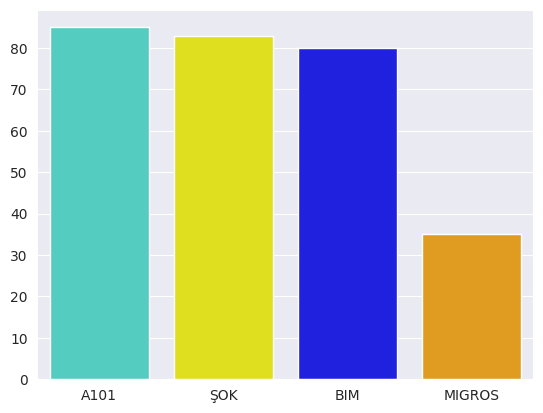

In [9]:
# Create number of stores in Maltepe.
number_of_stores = {'A101': [85], 'ŞOK': [83], 'BIM': [80], 'MIGROS': [35]}

# Ratio of migros stores in Maltepe to the total number of stores.
print(f'Percentage of Migros stores in Maltepe: {round((35/(85+83+80+35)*100),ndigits=2)}%')

# Create bar plot.
sns.set_style("darkgrid")
sns.barplot(number_of_stores, palette=['#40E0D0', 'yellow', 'blue', 'orange'])
plt.savefig('barplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Creating a dataframe.
pie_plot_data = {'labels':['A101', 'ŞOK', 'BIM', 'MIGROS'],
                 'values':[85, 83, 80, 35]}
pp_df = pd.DataFrame(pie_plot_data)

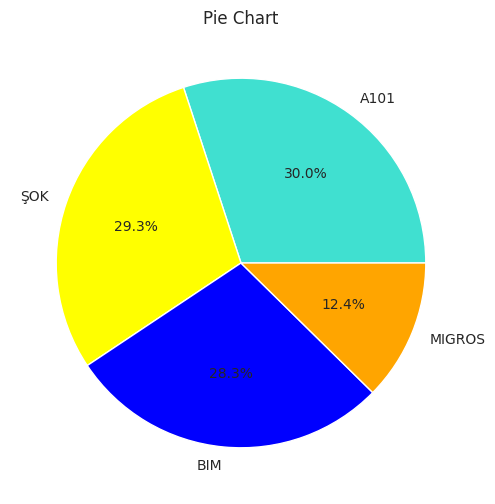

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
plt.pie(pp_df['values'], labels=pp_df['labels'], autopct='%1.1f%%', colors=['#40E0D0', 'yellow', 'blue', 'orange'])
plt.title('Pie Chart')
plt.savefig('piechart.png', dpi=300, bbox_inches='tight')
plt.show()

# Density Map

## Calculations used to determine the Grids to be created

In [12]:
# A coordinate we randomly chose in Maltepe
random_coordinate = (40.9000, 29.0900)

# The change in meters caused by a longitude step of 0.0005 degrees at this point.
longitude_to_meters = geodesic(random_coordinate, (40.900, 29.0905)).meters
print(f"The change in meters caused by a longitude step of 0.005 degrees at this point is approximately = {longitude_to_meters:.2f}m")

# The change in meters caused by a latitude step of 0.0005 degrees at this point.
latitude_to_meters = geodesic(random_coordinate, (40.9005, 29.090)).meters

print(f"The change in meters caused by a latitude step of 0.005 degrees at this point is approximately = {latitude_to_meters:.2f}m")

The change in meters caused by a longitude step of 0.005 degrees at this point is approximately = 42.13m
The change in meters caused by a latitude step of 0.005 degrees at this point is approximately = 55.53m


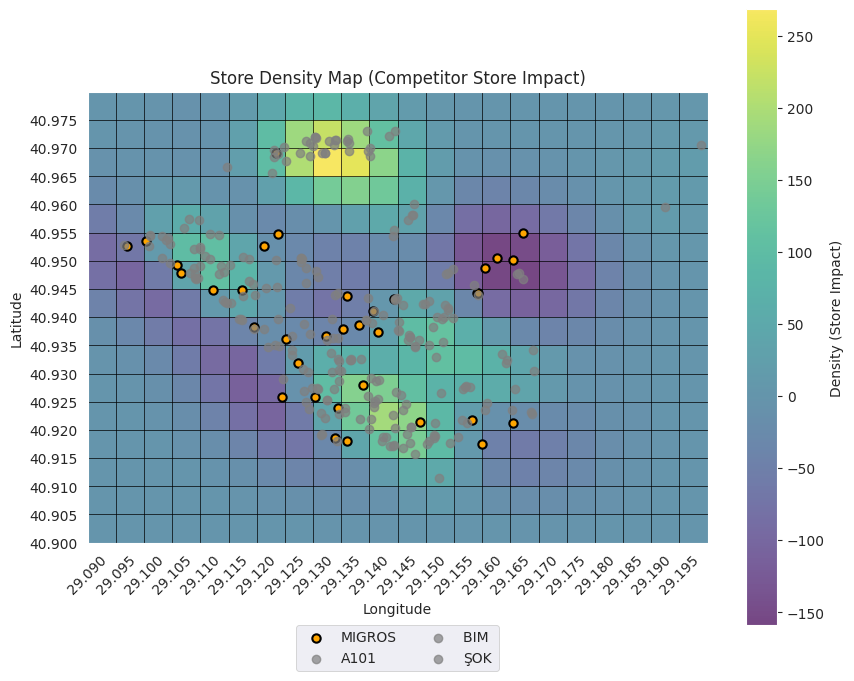

In [13]:
# Create lists for coordinates of stores
migros_x = [migros["coordinate"][1] for migros in migros_coordinates]
migros_y = [migros["coordinate"][0] for migros in migros_coordinates]

a101_x = [a101["coordinate"][1] for a101 in a101_coordinates]
a101_y = [a101["coordinate"][0] for a101 in a101_coordinates]

bim_x = [bim["coordinate"][1] for bim in bim_coordinates]
bim_y = [bim["coordinate"][0] for bim in bim_coordinates]

sok_x = [sok["coordinate"][1] for sok in sok_coordinates]
sok_y = [sok["coordinate"][0] for sok in sok_coordinates]

area_x = [area["coordinate"][1] for area in restricted_area]
area_y = [area["coordinate"][0] for area in restricted_area]

# Collect the X and Y coordinates of all stores in one list.
all_x = np.concatenate([migros_x, a101_x, bim_x, sok_x])
all_y = np.concatenate([migros_y, a101_y, bim_y, sok_y])

# Create lists for each store.
migros_coords = list(zip(migros_x, migros_y))
a101_coords = list(zip(a101_x, a101_y))
bim_coords = list(zip(bim_x, bim_y))
sok_coords = list(zip(sok_x, sok_y))

# Calculate density values for each coordinate using Gaussian Kernel Density Estimation.
kde_all = gaussian_kde([all_x, all_y])
kde_migros = gaussian_kde(np.transpose(migros_coords))

# Create grids
x_grid, y_grid = np.mgrid[29.09:29.20:22j, 40.90:40.98:16j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Calculate density values for each grid.
density_all = np.reshape(kde_all(positions).T, x_grid.shape)
density_migros = np.reshape(kde_migros(positions).T, x_grid.shape)

# Subtract the density values of migros stores from the total density values.
density_rakip = density_all - density_migros

# Set figure.
plt.figure(figsize=(10, 8))

# Plot density chart.
plt.imshow(np.rot90(density_rakip), cmap=plt.cm.viridis, extent=[29.09, 29.20, 40.90, 40.98], alpha=0.7)
plt.colorbar(label='Density (Store Impact)')

# Add grid lines to the chart.
plt.grid(color='black', linestyle='-', linewidth=0.5)

# Add coordinates of stores using scatter plots.
plt.scatter(migros_x, migros_y, color='orange', label='MIGROS', marker='o', edgecolors='black', linewidth=1.5)
plt.scatter(a101_x, a101_y, color='gray', label='A101', marker='o', alpha=0.7)
plt.scatter(bim_x, bim_y, color='gray', label='BIM ', marker='o', alpha=0.7)
plt.scatter(sok_x, sok_y, color='gray', label='ŞOK', marker='o', alpha=0.7)

# Add title and labels.
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Store Density Map (Competitor Store Impact)')

# Add legend.
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=2)  # Orta, alt kısımda
legend.get_frame().set_linewidth(0.7)  # Lejant çerçeve kalınlığı


# Save the figure.
plt.savefig('density_map.png', dpi=300, bbox_inches='tight')
plt.xticks(np.arange(29.09, 29.20, 0.005), rotation=45)
plt.yticks(np.arange(40.90,40.98, 0.005))
# Show the figure.
plt.show()

In [14]:
# Create data frames, using calculated density values.
longitude_values = np.arange(29.09, 29.20, 0.005)
latitude_values = np.arange(40.90, 40.98, 0.005)

df_density_all = pd.DataFrame(data=density_all, index=longitude_values, columns=latitude_values)
df_density_migros = pd.DataFrame(data=density_migros, index=longitude_values, columns=latitude_values)

In [15]:
df_density_all.to_excel('/home/umutky/Documents/bitirme_projesi/data/fall_density_all.xlsx')
df_density_all.to_excel('/home/umutky/Documents/bitirme_projesi/data/fall_density_migros.xlsx')

df_density_final = df_density_all - df_density_migros
df_density_final.to_excel('/home/umutky/Documents/bitirme_projesi/data/fall_density_final.xlsx')

In [16]:
# The sample used in the study.
df_density_all.iloc[10:14,7:11]

,40.935,40.940,40.945,40.950
29.140,463.071940,397.164607,231.347714,123.542634
29.145,444.841208,385.384570,236.930507,145.733311
29.150,373.194873,328.515808,225.587405,140.712116
29.155,264.324930,244.347163,192.115496,118.626635


In [17]:
# The sample used in the study.
df_density_migros.iloc[10:14,7:11]

,40.935,40.940,40.945,40.950
29.140,433.432891,391.188244,269.120129,145.950093
29.145,343.824720,334.528160,262.292078,166.333174
29.150,259.114693,295.474797,282.529277,210.152054
29.155,198.930848,276.598511,308.864778,249.413029


In [18]:
# The sample used in the study.
df_density_final.iloc[10:14,7:11]

,40.935,40.940,40.945,40.950
29.140,29.639048,5.976363,-37.772414,-22.407459
29.145,101.016488,50.856410,-25.361571,-20.599864
29.150,114.080180,33.041011,-56.941872,-69.439938
29.155,65.394082,-32.251348,-116.749282,-130.786394


# Maltepe'de Mahalleler bazinda verileri kullanarak yapalim.

In [19]:
maltepe_sinir_koordinatlar = [[40.95202948 , 29.09540176], [40.97289962 , 29.12664413], [40.98106441 , 29.19805527], [40.94606537 , 29.21590805],
                              [40.92168470 , 29.20028687], [40.90702604 , 29.13848877]]

mahalle_adlari = ['Altaycesme', 'Altintepe', 'Aydinevler', 
                  'Baglarbasi', 'Basibuyuk', 'Buyukbakkalkoy', 
                  'Cevizli', 'Cinar', 'Esenkent',
                  'Feyzullah', 'Findikli', 'Girne', 
                  'Gulensu', 'Gulsuyu', 'Idealtepe', 
                  'Kucukyali', 'Yali', 'Zumrutevler']

mahalle_koordinat = [[40.931350295726496, 29.13004580288397], [40.951584527393095, 29.101205138161465], [40.949297321468165, 29.12324802217451],
                     [40.92595977247705, 29.13433467791579], [40.95880863043053, 29.148363197540196], [40.97087919644714, 29.198312937578116],
                     [40.911606866191114, 29.168643075674318], [40.943499668859246, 29.11454095288986], [40.9270800114825, 29.167683738766232],
                     [40.92721565415718, 29.127159112869276], [40.968085684760894, 29.12477918026858], [40.94245188368451, 29.141611465806605],
                     [40.93535438411732, 29.162024095321975], [40.928698897558306, 29.155057024109794], [40.94104705315858, 29.121812032086222],
                     [40.94923770098426, 29.11460999191842], [40.92105781147672, 29.12940074262555], [40.9435523034861, 29.15037334792318]]

mahalle_ve_koordinat = pd.DataFrame({'name' : mahalle_adlari, 'coordinate': mahalle_koordinat})

population = np.array([32664, 31993,20761,42683,21951,11285,40606,20722,18977,20397,64987,19196,14403,15097,24970,26086,13100,88666])
# bu yok ! area = np.array([1.30, 1.0, 1.40, 1.60, 10.20, 21.70, 2.20, 1.0, 1.20, 0.81, 1.20, 0.77, 0.90, 0.91, 1.30, 1.0, 2.30, 3.20])
# bu yok ! population_density = list(population/area)
socioeconomic_level = [8, 10, 8, 8, 6, 6, 8, 10, 7, 10, 6, 8, 3, 5, 10, 8, 10, 7]

neigh_coords = [
    {
    'name': mahalle_adlari,
    'coordinate': mahalle_koordinat,
    'population': population,
    'socioeconomic_level': socioeconomic_level
    }
]

# Maltepe İlçesi Çalışma

In [21]:
# Maltepe İlçe Sınırları

maltepe_sinir_koordinatlar = [[40.95202948 , 29.09540176], [40.97289962 , 29.12664413], [40.98106441 , 29.19805527], [40.94606537 , 29.21590805],
                              [40.92168470 , 29.20028687], [40.90702604 , 29.13848877]]

Magaza Koordinatlari

In [2]:
# Coordinates of A101 stores.
a101_coordinates = [
    {"name": "Adalı", "coordinate": [40.927394883085235, 29.129755968898213]},
    {"name": "Adatepe", "coordinate": [40.945790719761604, 29.158524608036142]},
    {"name": "Ahmet Kutsi Tecer", "coordinate": [40.94697264869294, 29.108992595588575]},
    {"name": "Akarsu", "coordinate": [40.94320020106798, 29.14449386704606]},
    {"name": "Altayçeşme", "coordinate": [40.93709684710951, 29.129451295588076]},
    {"name": "Atatürk", "coordinate": [40.932473517602, 29.13659263658489]},
    {"name": "Ayerdem", "coordinate": [40.93334053257737, 29.126336916594965]},
    {"name": "Ayhan", "coordinate": [40.91748109292999, 29.150235387789607]},
    {"name": "Bağdat Park", "coordinate": [40.91869123203214, 29.142348945765892]},
    {"name": "Bağlarbaşı", "coordinate": [40.92390667555307, 29.135720080242788]},
    {"name": "Başıbüyük", "coordinate": [40.95806043821966, 29.147749778886645]},
    {"name": "Bülbül", "coordinate": [40.945248349238604, 29.121603422571827]},
    {"name": "Büyükbakkalköy", "coordinate": [40.97052190607659, 29.198820234230894]},
    {"name": "Camialtı", "coordinate": [40.958074773304325, 29.147542257606666]},
    {"name": "Canan", "coordinate": [40.93999089666084, 29.151950365579967]},
    {"name": "Değirmenyolu", "coordinate": [40.95442013315046, 29.101123215161365]},
    {"name": "Doğuşkent", "coordinate": [40.93947090004343, 29.139418992788137]},
    {"name": "Dragos", "coordinate": [40.91728899109436, 29.144277700000487]},
    {"name": "Efe Boz", "coordinate": [40.93624733683455, 29.133488717904036]},
    {"name": "Elifli", "coordinate": [40.93952567986965, 29.139381265431897]},
    {"name": "Ertuğrul Gazi", "coordinate": [40.948470330387245, 29.1547878715784]},
    {"name": "Eski Bağdat", "coordinate": [40.94702549200248, 29.109547693411244]},
    {"name": "Evren", "coordinate": [40.97198499803409, 29.130256420815687]},
    {"name": "Fatih", "coordinate": [40.92046478730853, 29.147404819387035]},
    {"name": "Figen", "coordinate": [40.92615799253096, 29.14552500589081]},
    {"name": "Filiz", "coordinate": [40.936578426258606, 29.14713455596701]},
    {"name": "Fındıklı", "coordinate": [40.971202286232355, 29.135924803001316]},
    {"name": "Girne", "coordinate": [40.943493943193914, 29.14495179745375]},
    {"name": "Grand House", "coordinate": [40.923046846303116, 29.131475958484746]},
    {"name": "Gül", "coordinate": [40.95218713357522, 29.10994516390435]},
    {"name": "Gülsuyu", "coordinate": [40.92764419655678, 29.15696404057653]},
    {"name": "Gülyolu", "coordinate": [40.92485574587402, 29.14088192613519]},
    {"name": "Güneşlik", "coordinate": [40.922768910478915, 29.168870251895438]},
    {"name": "Handegül", "coordinate": [40.94234542075043, 29.14945903212188]},
    {"name": "Hanımeli", "coordinate": [40.93781973383071, 29.145038866751978]},
    {"name": "Heykel", "coordinate": [40.931897227392454, 29.16420758354888]},
    {"name": "Kadir Has", "coordinate": [40.94368194803579, 29.117591299214254]},
    {"name": "Kartal", "coordinate": [40.93654913833068, 29.14726759744085]},
    {"name": "Kavaklıbayır", "coordinate": [40.96668135619129, 29.114802774304895]},
    {"name": "Kooperatif", "coordinate": [40.928863160423774, 29.14173620789344]},
    {"name": "Küçükyalı", "coordinate": [40.93234703451013, 29.136646549836268]},
    {"name": "Kılavuzçayırı", "coordinate": [40.95238151964869, 29.10986665140849]},
    {"name": "Kırlangıç", "coordinate": [40.92722413852877, 29.133725080243018]},
    {"name": "Kırçiçeği", "coordinate": [40.950434119475744, 29.127854717295303]},
    {"name": "Madenci", "coordinate": [40.94032453090845, 29.14242820164443]},
    {"name": "Maltepe", "coordinate": [40.92862045414734, 29.134665477144317]},
    {"name": "Mavıevler", "coordinate": [40.946097556545276, 29.12880362390243]},
    {"name": "Menekşeci Darkstore", "coordinate": [40.97140661473956, 29.133924370173283]},
    {"name": "Mercan", "coordinate": [40.97143901739909, 29.134138946895533]},
    {"name": "Namık Kemal", "coordinate": [40.93782327708093, 29.12133876675202]},
    {"name": "Nedim Özpolat", "coordinate": [40.91918156355658, 29.131472337914726]},
    {"name": "Nil Caddesı", "coordinate": [40.94123489075919, 29.153956025232937]},
    {"name": "Nish Adalar", "coordinate": [40.94683712314109, 29.16719959558862]},
    {"name": "Orhangazi", "coordinate": [40.920479325615176, 29.14735552723237]},
    {"name": "Orkide", "coordinate": [40.92358760959293, 29.14591311378964]},
    {"name": "Ortanca", "coordinate": [40.93233737572602, 29.164425964993736]},
    {"name": "Palmiye", "coordinate": [40.97043908018438, 29.130019595590085]},
    {"name": "Piri Reis", "coordinate": [40.91708383018474, 29.143594824422983]},
    {"name": "Preveze", "coordinate": [40.94865312002092, 29.12871766675268]},
    {"name": "Ritim İstanbul", "coordinate": [40.92122786710252, 29.157222156156422]},
    {"name": "Sahil", "coordinate": [40.919270134807334, 29.131550271622423]},
    {"name": "Saray Maltepe", "coordinate": [40.94276202024538, 29.114332385182973]},
    {"name": "Sarmaşık", "coordinate": [40.97197054979308, 29.130265509192995]},
    {"name": "Seyitağa", "coordinate": [40.96895696591541, 29.123756171008925]},
    {"name": "Seyrantepe", "coordinate": [40.94768409358067, 29.166132798526473]},
    {"name": "Sulhi Dönmezer", "coordinate": [40.930277200380615, 29.133284555638674]},
    {"name": "Sırmakeş", "coordinate": [40.9396458282932, 29.1528508161723]},
    {"name": "Talatpaşa", "coordinate": [40.9185783171644, 29.151399680297757]},
    {"name": "Toros", "coordinate": [40.91718960109349, 29.14424450598503]},
    {"name": "Tülin", "coordinate": [40.93491750586262, 29.148000761384083]},
    {"name": "Varna Maltepe", "coordinate": [40.93360061298113, 29.133128870889713]},
    {"name": "Yeni Hancıoğlu", "coordinate": [40.97002274280754, 29.140095813262924]},
    {"name": "Yeni Selvi", "coordinate": [40.96915224060489, 29.127712327367597]},
    {"name": "Yeni Selçukbey", "coordinate": [40.95041177110291, 29.127988561740242]},
    {"name": "Yeşiltepe", "coordinate": [40.93976307558044, 29.11683454795809]},
    {"name": "Yüzevler", "coordinate": [40.93410039239821, 29.12622891093225]},
    {"name": "Yıldırım", "coordinate": [40.92787699876612, 29.15715151412576]},
    {"name": "Zencefıl", "coordinate": [40.92719657520457, 29.16578829373469]},
    {"name": "Zuhal", "coordinate": [40.91765828300148, 29.154259993734073]},
    {"name": "Zümrüt Evler", "coordinate": [40.93969573233883, 29.117204716626933]},
    {"name": "Çamlı E5", "coordinate": [40.93965706296123, 29.133351893735465]},
    {"name": "Çağla", "coordinate": [40.947899653357794, 29.16649500612658]},
    {"name": "Çetin", "coordinate": [40.94873403528536, 29.108871445617062]},
    {"name": "Çınar Maltepe", "coordinate": [40.947581725490295, 29.109043179708422]},
    {"name": "Özmen", "coordinate": [40.947855637118835, 29.108184945533097]},
    {"name": "İdealtepe", "coordinate": [40.93946988115979, 29.117319572778445]}
]

# Coordinates of BIM stores.
bim_coordinates = [
    {"name": "5 ADA MALTEPE", "coordinate": [40.94386611375143, 29.1593275547878]},
    {"name": "50. YIL / MALTEPE", "coordinate": [40.94170836109047, 29.125923317801558]},
    {"name": "ADATEPE / MALTEPE", "coordinate": [40.934796487365354, 29.12198313146719]},
    {"name": "ALTINTEPE / MALTEPE", "coordinate": [40.95369322987723, 29.103950633501157]},
    {"name": "ATAMAN /MALTEPE", "coordinate": [40.96905938171349, 29.13207767054535]},
    {"name": "AYDINEVLER / MALTEPE", "coordinate": [40.94985677674711, 29.12786684694814]},
    {"name": "BAĞDAT /MALTEPE", "coordinate": [40.949654109509304, 29.10452194539834]},
    {"name": "BARIŞ / MALTEPE", "coordinate": [40.93989783562922, 29.154892719399843]},
    {"name": "BAŞAK / MALTEPE", "coordinate": [40.94800497158564, 29.11417993706625]},
    {"name": "BAŞARAN / MALTEPE", "coordinate": [40.93299949439397, 29.151859974628895]},
    {"name": "BAŞIBÜYÜK / MALTEPE", "coordinate": [40.95724604212229, 29.146871673430965]},
    {"name": "BAŞIBÜYÜK /MALTEPE", "coordinate": [40.97296800999857, 29.14446503813377]},
    {"name": "BEGONYA / MALTEPE", "coordinate": [40.93882155180379, 29.12830015179489]},
    {"name": "BEŞEVLER / MALTEPE", "coordinate": [40.92524624311455, 29.13240108769613]},
    {"name": "BÜYÜKTUR /MALTEPE", "coordinate": [40.93784048147304, 29.11952163506918]},
    {"name": "CADDE YÜZEVLER / MALTEPE", "coordinate": [40.930324252671795, 29.129116939058743]},
    {"name": "ÇAMLIK / MALTEPE", "coordinate": [40.94306827512642, 29.14447439353678]},
    {"name": "ÇARŞI / MALTEPE", "coordinate": [40.92526790248133, 29.13240319983509]},
    {"name": "ÇINAR / MALTEPE", "coordinate": [40.96856136703116, 29.140070293003298]},
    {"name": "DEĞİRMENYOLU /MALTEPE", "coordinate": [40.95450431329372, 29.101147948094518]},
    {"name": "DENİZCİLER / MALTEPE", "coordinate": [40.92680486970823, 29.144634970990133]},
    {"name": "DOĞUŞKENT / MALTEPE", "coordinate": [40.938922039048016, 29.140371114762267]},
    {"name": "DRAGOS / KARTAL", "coordinate": [40.91148500049741, 29.152348242954268]},
    {"name": "EFEBOZ /MALTEPE", "coordinate": [40.935995323794735, 29.13252067830462]},
    {"name": "EMEK /MALTEPE", "coordinate": [40.950260769456435, 29.11864830321464]},
    {"name": "ERCİYES / MALTEPE", "coordinate": [40.91571477764781, 29.14808064302144]},
    {"name": "ESENKENT / MALTEPE", "coordinate": [40.923207082700124, 29.16864021452266]},
    {"name": "EVREN CAD. / MALTEPE", "coordinate": [40.969633352419756, 29.123062987094592]},
    {"name": "FERAH / MALTEPE", "coordinate": [40.942204568009444, 29.153465990089504]},
    {"name": "FEYZULLAH / MALTEPE", "coordinate": [40.92376657950671, 29.129281481374232]},
    {"name": "GAZİ / MALTEPE", "coordinate": [40.97125053840908, 29.132820300844788]},
    {"name": "GİRNE / MALTEPE", "coordinate": [40.94339937502391, 29.13979040766674]},
    {"name": "GÜLENSU / MALTEPE", "coordinate": [40.933430436738576, 29.16353932315151]},
    {"name": "GÜLSUYU / MALTEPE", "coordinate": [40.92727775602385, 29.15667057051255]},
    {"name": "GÜLYOLU / MALTEPE", "coordinate": [40.92398979400527, 29.14078350068368]},
    {"name": "HANCIOĞLU / MALTEPE", "coordinate": [40.96908529499158, 29.13207796610294]},
    {"name": "HANIMELİ / MALTEPE", "coordinate": [40.93746760608058, 29.145266731005083]},
    {"name": "HASTANE / MALTEPE", "coordinate": [40.921854070921945, 29.13836770942411]},
    {"name": "IŞIKLAR / MALTEPE", "coordinate": [40.93265015812681, 29.136805254833604]},
    {"name": "İDEALTEPE / MALTEPE", "coordinate": [40.94253446386219, 29.114689753785473]},
    {"name": "İNCEYOL / MALTEPE", "coordinate": [40.954761889605436, 29.1117688779914]},
    {"name": "KADRİYE HATUN / MALTEPE", "coordinate": [40.94533439803117, 29.123663089916683]},
    {"name": "KANİPAŞA MALTEPE", "coordinate": [40.930472920695145, 29.16921541768973]},
    {"name": "KARACA / MALTEPE", "coordinate": [40.94791098129229, 29.15396458037732]},
    {"name": "KARADENİZ / MALTEPE", "coordinate": [40.94811934292254, 29.13046067218526]},
    {"name": "KARANFİL / MALTEPE", "coordinate": [40.94006352033881, 29.153250526834565]},
    {"name": "KARAYOLLARI / MALTEPE", "coordinate": [40.94634248278612, 29.118673632713776]},
    {"name": "KARDEŞ / MALTEPE", "coordinate": [40.92130331815685, 29.15163275563329]},
    {"name": "KENTPLUS /MALTEPE", "coordinate": [40.96776727420696, 29.125242132082306]},
    {"name": "KIRÇİÇEĞİ / MALTEPE", "coordinate": [40.950155909583316, 29.12333873804331]},
    {"name": "KIZILAY /MALTEPE", "coordinate": [40.93495294906234, 29.123986474315767]},
    {"name": "KOOPERATİF / MALTEPE", "coordinate": [40.92864245147052, 29.141128058917342]},
    {"name": "KÜÇÜKYALI / MALTEPE", "coordinate": [40.946811323681494, 29.109222604389288]},
    {"name": "MALTEPE / İSTANBUL", "coordinate": [40.927311770690615, 29.130783941688712]},
    {"name": "MENDERES/MALTEPE", "coordinate": [40.942094740070374, 29.146026787432554]},
    {"name": "MERCAN/MALTEPE", "coordinate": [40.935869299337135, 29.14681401412792]},
    {"name": "NADİRE / MALTEPE", "coordinate": [40.924720417049784, 29.16093599314204]},
    {"name": "OMEGA / MALTEPE", "coordinate": [40.944022249043236, 29.13390859205389]},
    {"name": "ORHANGAZİ / MALTEPE", "coordinate": [40.91929515747133, 29.14664457386512]},
    {"name": "ORTAK / MALTEPE", "coordinate": [40.932519065593176, 29.134445708448418]},
    {"name": "ÖZCAN / MALTEPE", "coordinate": [40.92008626106238, 29.139837187528876]},
    {"name": "SAĞLIK / MALTEPE", "coordinate": [40.93046024955185, 29.134863577367213]},
    {"name": "SAHİL / MALTEPE", "coordinate": [40.91805183551388, 29.13426704603057]},
    {"name": "SEVGİ / MALTEPE", "coordinate": [40.91765418027347, 29.14722682004058]},
    {"name": "SÜMBÜL / MALTEPE", "coordinate": [40.970288026441445, 29.124820764698743]},
    {"name": "SÜREYYA PAŞA / MALTEPE", "coordinate": [40.95437581782561, 29.14423945532768]},
    {"name": "TALATPAŞA / MALTEPE", "coordinate": [40.91796385005236, 29.150548171811565]},
    {"name": "TUGAYYOLU / MALTEPE", "coordinate": [40.918759046754715, 29.155692523034652]},
    {"name": "TURHAN / MALTEPE", "coordinate": [40.93667083938017, 29.1262822698654]},
    {"name": "TÜLİN / MALTEPE", "coordinate": [40.93600401826493, 29.148807687408983]},
    {"name": "YASEMİN / MALTEPE", "coordinate": [40.97221929574175, 29.143452562135174]},
    {"name": "YAVUZ SELİM / KARTAL", "coordinate": [40.91875168842416, 29.14293912954519]},
    {"name": "YENİ FINDIKLII /MALTEPE", "coordinate": [40.97166185657184, 29.13618596624144]},
    {"name": "YENİYOL MALTEPE", "coordinate": [40.92316922414561, 29.135729184801686]},
    {"name": "ZÜMRÜTEVLER / MALTEPE", "coordinate": [40.94241621779482, 29.14991393271687]}
]

# Coordinates of ŞOK stores.
sok_coordinates = [
    {"name": "İSTANBUL KÜÇÜKYALI KILAVUZ ÇAYIRI MAĞAZA", "coordinate": [40.952189, 29.108784]},
    {"name": "İSTANBUL ALTINTEPE MAĞAZASI", "coordinate": [40.954355, 29.103107]},
    {"name": "İSTANBUL MALTEPE KAMPÜS MAĞAZASI", "coordinate": [40.959541, 29.192393]},
    {"name": "İSTANBUL İÇERENKÖY FINDIKLI MAĞAZASI", "coordinate": [40.969200, 29.131538]},
    {"name": "İSTANBUL BAŞIBÜYÜK CADDE MAĞAZASI", "coordinate": [40.941176, 29.140728]},
    {"name": "İSTANBUL MALTEPE TALATPAŞA MAĞAZASI", "coordinate": [40.919074, 29.151436]},
    {"name": "İSTANBUL KARAYOLLARI 50.YIL PARKI MAĞAZASI", "coordinate": [40.943955, 29.119734]},
    {"name": "İSTANBUL TEYFİK SAĞLAM MALTEPE MAĞAZASI", "coordinate": [40.952918, 29.104535]},
    {"name": "İSTANBUL MEKTEP CD.MALTEPE MAĞAZASI", "coordinate": [40.950262, 29.111703]},
    {"name": "İSTANBUL ALTAY MALTEPE MAĞAZASI", "coordinate": [40.930548, 29.134566]},
    {"name": "İSTANBUL BAĞDATTEPE ALTINTEPE MAĞAZASI", "coordinate": [40.952598, 29.100870]},
    {"name": "İSTANBUL MALTEPE YALI MAĞAZASI", "coordinate": [40.926481, 29.152631]},
    {"name": "İSTANBUL ŞEHİT RIZA ESENKENT MAĞAZASI", "coordinate": [40.923483, 29.165234]},
    {"name": "İSTANBUL İNCEYOL SK.ALTINTEPE MAĞAZASI", "coordinate": [40.954505, 29.113231]},
    {"name": "İSTANBUL GALİPBEY CD.ALTINTEPE MAĞAZASI", "coordinate": [40.955847, 29.107113]},
    {"name": "İSTANBUL ESENKENT MAĞAZASI", "coordinate": [40.923551, 29.160437]},
    {"name": "İSTANBUL MALTEPE HANCIOĞLU", "coordinate": [40.968649, 29.129436]},
    {"name": "İSTANBUL ÇINAR MAH.KÜÇÜKYALI MAĞAZASI", "coordinate": [40.943042, 29.114093]},
    {"name": "İSTANBUL GİRNE MAHALLESİ ELİF SOKAK MAĞAZASI", "coordinate": [40.926883, 29.128331]},
    {"name": "İSTANBUL SÜMEN SK.İDEALTEPE MAĞAZASI", "coordinate": [40.952898, 29.096504]},
    {"name": "İSTANBUL MALTEPE KRİZANTEM MAĞAZASI", "coordinate": [40.924982, 29.128816]},
    {"name": "İSTANBUL KÜÇÜKYALI ALTMIŞÜÇ MAĞAZASI", "coordinate": [40.950446, 29.103232]},
    {"name": "İSTANBUL KÜÇÜKYALI ADİLE HANIM MAĞAZASI", "coordinate": [40.949261, 29.115270]},
    {"name": "İSTANBUL ZÜMRÜTEVLER ERTUĞRUL SOKAK MAĞAZASI", "coordinate": [40.934765, 29.148148]},
    {"name": "İSTANBUL MALTEPE İKİNCİ İLKOKUL CADDESİ MAĞAZASI", "coordinate": [40.922134, 29.132185]},
    {"name": "İSTANBUL ZÜMRÜTEVLER TÜLİN CADDE MAĞAZASI", "coordinate": [40.938321, 29.151346]},
    {"name": "İSTANBUL GÜLYOLU SK.MALTEPE MAĞAZASI", "coordinate": [40.925132, 29.140962]},
    {"name": "İSTANBUL FINDIKLI ÇINAR CADDESİ MAĞAZASI", "coordinate": [40.969513, 29.139731]},
    {"name": "İSTANBUL MALTEPE TEKEL BLOKLARI MAĞAZASI", "coordinate": [40.932258, 29.134530]},
    {"name": "İSTANBUL ZÜMRÜTEVLER KALEYURT MAĞAZASI", "coordinate": [40.947599, 29.153601]},
    {"name": "İSTANBUL MALTEPE YAVUZ SOKAK MAĞAZASI", "coordinate": [40.920362, 29.144546]},
    {"name": "İSTANBUL ZÜMRÜT EVLER FİLİZ SOKAK MAĞAZASI", "coordinate": [40.939159, 29.145238]},
    {"name": "MALTEPE TUGAY YOLU EMİR MAĞAZASI", "coordinate": [40.921834, 29.156493]},
    {"name": "İSTANBUL MALTEPE ÇIRAK SOKAK MAĞAZASI", "coordinate": [40.924587, 29.146540]},
    {"name": "MALTEPE EMEK CADDE MAĞAZASI", "coordinate": [40.935522, 29.153134]},
    {"name": "İSTANBUL MALTEPE ADALI SOKAK MAĞAZASI", "coordinate": [40.927510, 29.130667]},
    {"name": "ŞOK MİNİ-ZÜMRÜTEVLER MAĞAZASI", "coordinate": [40.935045, 29.150609]},
    {"name": "MALTEPE FINDIKLI PALMİYE CADDESİ MAĞAZASI", "coordinate": [40.971760, 29.130433]},
    {"name": "MALETEPE ŞEHİT HİKMET ALP CADDESİ MAĞAZASI", "coordinate": [40.935099, 29.123247]},
    {"name": "İSTANBUL KÜÇÜKYALI POYRAZ SOKAK MAĞAZASI", "coordinate": [40.947081, 29.130927]},
    {"name": "İSTANBUL MALTEPE BAŞIBÜYÜK YILDIZ SOK. MAĞAZASI", "coordinate": [40.960123, 29.147977]},
    {"name": "ZÜMRÜTEVLER AKŞEMSETTİN CAD MAĞAZASI", "coordinate": [40.936870, 29.146944]},
    {"name": "ŞOK MİNİ-YILMAZ2 MAĞAZASI", "coordinate": [40.934241, 29.169088]},
    {"name": "İSTANBUL MALTEPE KADİR HAS CAD MAĞAZASI", "coordinate": [40.942511, 29.115440]},
    {"name": "ŞOK MİNİ-ALTINTEPE MAĞAZASI", "coordinate": [40.957461, 29.107904]},
    {"name": "İSTANBUL MALTEPE BAĞLARBAŞI İNÖNÜ CAD MAĞAZASI", "coordinate": [40.926021, 29.139759]},
    {"name": "İSTANBUL ZÜMRÜTEVLER KARACA CAD MAĞAZASI", "coordinate": [40.942940, 29.150493]},
    {"name": "İSTANBUL ALTINTEPE CİHADİYE CAD MAĞAZASI", "coordinate": [40.957250, 29.109799]},
    {"name": "İSTANBUL FINDIKLI ATAMAN CAD MAĞAZASI", "coordinate": [40.970875, 29.136299]},
    {"name": "ŞOKMİNİ-GALİPBEY MAĞAZASI", "coordinate": [40.954035, 29.104301]},
    {"name": "ŞOKMİNİ-SERİN MAĞAZASI", "coordinate": [40.970562, 29.133730]},
    {"name": "İSTANBUL MALTEPE ZÜMRÜTEVLER GİRNE CADDESİ MAĞAZASI", "coordinate": [40.944261, 29.134404]},
    {"name": "ŞOKMİNİ-YEŞİM MAĞAZASI", "coordinate": [40.972993, 29.139488]},
    {"name": "İSTANBUL KÜÇÜKYALI MUHSİNE ZEYNEP MAĞAZASI", "coordinate": [40.949159, 29.109979]},
    {"name": "İSTANBUL İDEALTEPE SANİMALAZ MAĞAZASI", "coordinate": [40.939697, 29.123696]},
    {"name": "İSTANBUL KÜÇÜKYALI MAĞAZASI", "coordinate": [40.949145, 29.113653]},
    {"name": "SOK", "coordinate": [40.921895, 29.140198]},
    {"name": "SOK", "coordinate": [40.955561, 29.144312]},
    {"name": "SOK", "coordinate": [40.929097, 29.124747]},
    {"name": "SOK", "coordinate": [40.925507, 29.141474]},
    {"name": "SOK", "coordinate": [40.927605, 29.157823]},
    {"name": "SOK", "coordinate": [40.918120, 29.142264]},
    {"name": "SOK", "coordinate": [40.930739, 29.128214]},
    {"name": "SOK", "coordinate": [40.936377, 29.134379]},
    {"name": "SOK", "coordinate": [40.922829, 29.134557]},
    {"name": "SOK", "coordinate": [40.941625, 29.153924]},
    {"name": "SOK", "coordinate": [40.965537, 29.122726]},
    {"name": "SOK", "coordinate": [40.916711, 29.145928]},
    {"name": "SOK", "coordinate": [40.971277, 29.128718]},
    {"name": "SOK", "coordinate": [40.969552, 29.136297]},
    {"name": "SOK", "coordinate": [40.970841, 29.129463]},
    {"name": "SOK", "coordinate": [40.922590, 29.144178]},
    {"name": "SOK", "coordinate": [40.932640, 29.138548]},
    {"name": "SOK", "coordinate": [40.929145, 29.140261]},
    {"name": "SOK", "coordinate": [40.947687, 29.113293]},
    {"name": "SOK", "coordinate": [40.918976, 29.151566]},
    {'name': 'SOK', 'coordinate': [40.945944, 29.119339]},
    {'name': 'SOK', 'coordinate': [40.950443, 29.127770]},
    {'name': 'SOK', 'coordinate': [40.950820, 29.110796]},
    {'name': 'SOK', 'coordinate': [40.950602, 29.117542]},
    {'name': 'SOK', 'coordinate': [40.968465, 29.123094]}
]

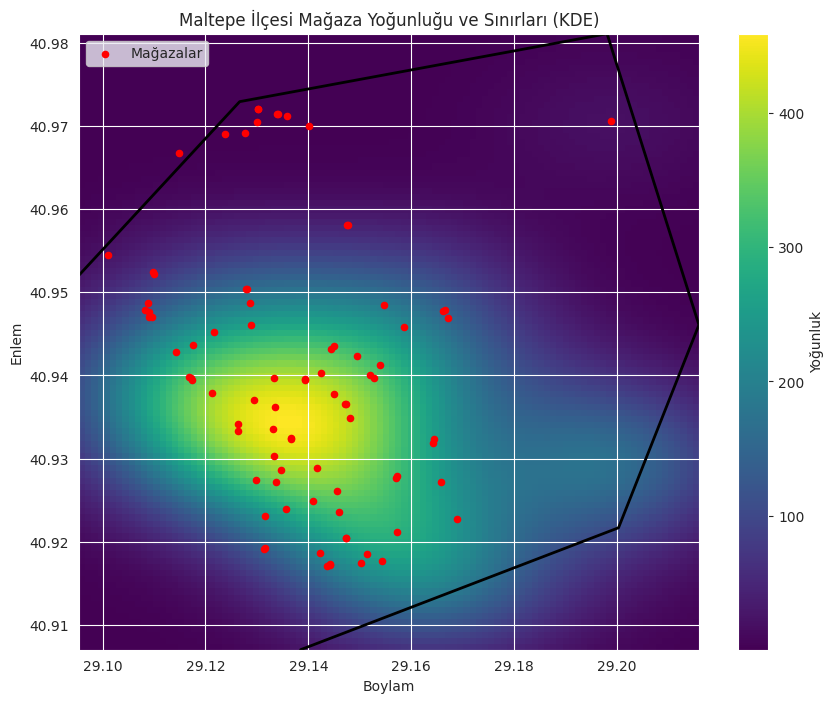

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Maltepe ilçesi sınırlarının koordinatları
maltepe_sinir_koordinatlar = np.array([[40.95202948, 29.09540176], [40.97289962, 29.12664413], [40.98106441, 29.19805527], [40.94606537, 29.21590805],
                                      [40.92168470, 29.20028687], [40.90702604, 29.13848877]])

# Mağaza koordinatları
mağaza_koordinatları = np.array([store["coordinate"] for store in a101_coordinates])

# KDE modelini oluştur
kde = KernelDensity(bandwidth=0.01, metric='haversine', kernel='gaussian')
kde.fit(mağaza_koordinatları)

# Haritayı oluştur
plt.figure(figsize=(10, 8))

# Maltepe ilçesi sınırlarını çiz
plt.plot(maltepe_sinir_koordinatlar[:, 1], maltepe_sinir_koordinatlar[:, 0], color='black', linewidth=2)

# Haritayı ızgaralara bölmek
x_min, y_min = np.min(maltepe_sinir_koordinatlar, axis=0)
x_max, y_max = np.max(maltepe_sinir_koordinatlar, axis=0)
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Her bir ızgaranın yoğunluk değerini hesapla
log_density = kde.score_samples(grid_points)
density = np.exp(log_density).reshape(x_grid.shape)

# Yoğunluk değerlerini görselleştir
plt.imshow(density, origin='lower', extent=[y_min, y_max, x_min, x_max], cmap='viridis', aspect='auto')
cbar = plt.colorbar(label='Yoğunluk')

# Mağaza konumlarını göster
plt.scatter(mağaza_koordinatları[:, 1], mağaza_koordinatları[:, 0], color='red', label='Mağazalar', s=20)

# Eksen etiketlerini ve başlığı ekle
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.title('Maltepe İlçesi Mağaza Yoğunluğu ve Sınırları (KDE)')
plt.legend()
plt.show()


In [23]:
# A coordinate we randomly chose in Maltepe
random_coordinate = (40.9000, 29.0900)

# The change in meters caused by a longitude step of 0.0005 degrees at this point.
longitude_to_meters = geodesic(random_coordinate, (40.900, 29.0920)).meters
print(f"The change in meters caused by a longitude step of 0.005 degrees at this point is approximately = {longitude_to_meters:.2f}m")

# The change in meters caused by a latitude step of 0.0005 degrees at this point.
latitude_to_meters = geodesic(random_coordinate, (40.9020, 29.090)).meters

print(f"The change in meters caused by a latitude step of 0.005 degrees at this point is approximately = {latitude_to_meters:.2f}m")

The change in meters caused by a longitude step of 0.005 degrees at this point is approximately = 168.52m
The change in meters caused by a latitude step of 0.005 degrees at this point is approximately = 222.10m


In [24]:
# Collect the X and Y coordinates of all stores in one list.
all_x = np.concatenate([migros_x, a101_x, bim_x, sok_x])
all_y = np.concatenate([migros_y, a101_y, bim_y, sok_y])

# Create lists for each store.
migros_coords = list(zip(migros_x, migros_y))
a101_coords = list(zip(a101_x, a101_y))
bim_coords = list(zip(bim_x, bim_y))
sok_coords = list(zip(sok_x, sok_y))


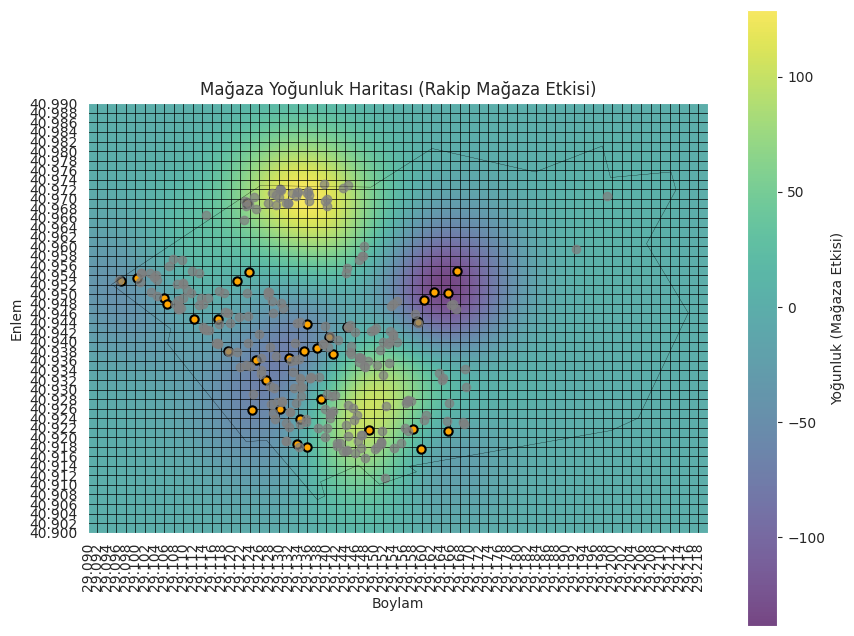

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Veri
migros_coords = np.array([[migros_x[i], migros_y[i]] for i in range(len(migros_x))])
all_coords = np.concatenate([migros_coords, a101_coords, bim_coords, sok_coords])

# Kernel yoğunluk tahmini
kde_all = KernelDensity(bandwidth=0.01, kernel='gaussian').fit(all_coords)
kde_migros = KernelDensity(bandwidth=0.01, kernel='gaussian').fit(migros_coords)

# Izgara oluştur
x_grid, y_grid = np.mgrid[29.09:29.22:500j, 40.90:40.990:500j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Yoğunluk değerlerini hesapla
density_all = np.exp(kde_all.score_samples(positions.T)).reshape(x_grid.shape)
density_migros = np.exp(kde_migros.score_samples(positions.T)).reshape(x_grid.shape)

# Migros mağazalarının yoğunluk değerlerini toplam yoğunluktan çıkar
density_rakip = density_all - density_migros

# Harita oluştur
plt.figure(figsize=(10, 8))
plt.imshow(np.rot90(density_rakip), cmap=plt.cm.viridis, extent=[29.09, 29.220, 40.90, 40.990], alpha=0.7)
plt.colorbar(label='Yoğunluk (Mağaza Etkisi)')

# Koordinatları göster
plt.scatter(migros_x, migros_y, color='orange', label='MIGROS', marker='o', edgecolors='black', linewidth=1.5)
plt.scatter(a101_x, a101_y, color='gray', label='A101', marker='o', alpha=0.7)
plt.scatter(bim_x, bim_y, color='gray', label='BIM ', marker='o', alpha=0.7)
plt.scatter(sok_x, sok_y, color='gray', label='ŞOK', marker='o', alpha=0.7)

# Harita başlık ve etiketler
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.title('Mağaza Yoğunluk Haritası (Rakip Mağaza Etkisi)')

# Sınır çizgisi
maltepe_sinir_koordinatlar = np.array([[40.95196465 , 29.09488678], [40.97277002 , 29.12621498], [40.97244599 , 29.14938927],
                                       [40.98054604 , 29.16217804], [40.97562133 , 29.18380737], [40.98106441 , 29.19788361], [40.97445490 , 29.19960022],
                                       [40.97562133 , 29.21230316], [40.97186275 , 29.21333313], [40.96058574 , 29.20715332], [40.94606537 , 29.21590805],
                                       [40.92401941 , 29.20543671], [40.92142529 , 29.19977188], [40.91390175 , 29.15737152], [40.91273423 , 29.15891647],
                                       [40.91013966 , 29.15119171], [40.91416119 , 29.14672852], [40.91065858 , 29.13883209], [40.90767472 , 29.13969040],
                                       [40.90689630 , 29.13814545], [40.91934991 , 29.12750244], [40.91909049 , 29.12321091], [40.93958203 , 29.10673141],
                                       [40.94269411 , 29.10741806], [40.95189983 , 29.09523010]])
plt.plot(maltepe_sinir_koordinatlar[:, 1], maltepe_sinir_koordinatlar[:, 0], color='black', linewidth=0.2)

# Eksenleri ayarla
plt.xticks(np.arange(29.09, 29.220, 0.002), rotation=90)
plt.yticks(np.arange(40.90, 40.990, 0.002))

# Haritayı göster
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Calculations of densities by KDE

In [26]:
from sklearn.preprocessing import MinMaxScaler

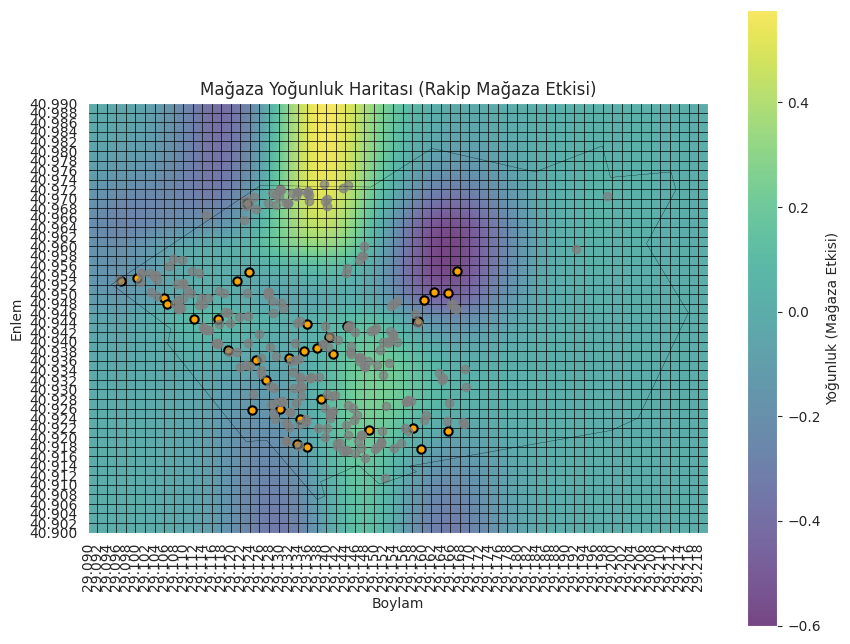

In [27]:
# Veri
migros_coords = np.array([[migros_x[i], migros_y[i]] for i in range(len(migros_x))])
all_coords = np.concatenate([migros_coords, a101_coords, bim_coords, sok_coords])

# Kernel yoğunluk tahmini
kde_all = KernelDensity(bandwidth=0.01, metric='haversine',kernel='gaussian').fit(all_coords)
kde_migros = KernelDensity(bandwidth=0.01, kernel='gaussian').fit(migros_coords)

# Izgara oluştur
x_grid, y_grid = np.mgrid[29.09:29.22:500j, 40.90:40.990:500j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# MinMax Scale
scaler = MinMaxScaler()
density_all_scaled = scaler.fit_transform(density_all)
density_migros_scaled = scaler.fit_transform(density_migros)

# Migros mağazalarının yoğunluk değerlerini toplam yoğunluktan çıkar
density_rakip = density_all_scaled - density_migros_scaled

# Harita oluştur
plt.figure(figsize=(10, 8))
plt.imshow(np.rot90(density_rakip), cmap=plt.cm.viridis, extent=[29.09, 29.220, 40.90, 40.990], alpha=0.7)
plt.colorbar(label='Yoğunluk (Mağaza Etkisi)')

# Koordinatları göster
plt.scatter(migros_x, migros_y, color='orange', label='MIGROS', marker='o', edgecolors='black', linewidth=1.5)
plt.scatter(a101_x, a101_y, color='gray', label='A101', marker='o', alpha=0.7)
plt.scatter(bim_x, bim_y, color='gray', label='BIM ', marker='o', alpha=0.7)
plt.scatter(sok_x, sok_y, color='gray', label='ŞOK', marker='o', alpha=0.7)

# Harita başlık ve etiketler
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.title('Mağaza Yoğunluk Haritası (Rakip Mağaza Etkisi)')

# Sınır çizgisi
maltepe_sinir_koordinatlar = np.array([[40.95196465 , 29.09488678], [40.97277002 , 29.12621498], [40.97244599 , 29.14938927],
                                       [40.98054604 , 29.16217804], [40.97562133 , 29.18380737], [40.98106441 , 29.19788361], [40.97445490 , 29.19960022],
                                       [40.97562133 , 29.21230316], [40.97186275 , 29.21333313], [40.96058574 , 29.20715332], [40.94606537 , 29.21590805],
                                       [40.92401941 , 29.20543671], [40.92142529 , 29.19977188], [40.91390175 , 29.15737152], [40.91273423 , 29.15891647],
                                       [40.91013966 , 29.15119171], [40.91416119 , 29.14672852], [40.91065858 , 29.13883209], [40.90767472 , 29.13969040],
                                       [40.90689630 , 29.13814545], [40.91934991 , 29.12750244], [40.91909049 , 29.12321091], [40.93958203 , 29.10673141],
                                       [40.94269411 , 29.10741806], [40.95189983 , 29.09523010]])
plt.plot(maltepe_sinir_koordinatlar[:, 1], maltepe_sinir_koordinatlar[:, 0], color='black', linewidth=0.2)

# Eksenleri ayarla
plt.xticks(np.arange(29.09, 29.220, 0.002), rotation=90)
plt.yticks(np.arange(40.90, 40.990, 0.002))

# Haritayı göster
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()